In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
df = pd.read_csv("Wednesday-workingHours.pcap_ISCX.csv")
df

C:\Users\rymms\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058824,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,389,433,11,4,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,88,1088,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,80,579225,132,150,160,320799,160,0,1.212121,13.926212,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,49666,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,49413,4,3,0,18,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [4]:
labels = df[' Label'].unique()
lb_count = []
for lb in labels:
    lb_count.append(sum(df[' Label']==lb))
    print(lb,",",sum(df[' Label']==lb))

BENIGN , 440031
DoS slowloris , 5796
DoS Slowhttptest , 5499
DoS Hulk , 231073
DoS GoldenEye , 10293
Heartbleed , 11


In [5]:
df_nodup = df.drop_duplicates()
df_nodup

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058824,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,389,433,11,4,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,88,1088,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,80,579225,132,150,160,320799,160,0,1.212121,13.926212,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,49666,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,49413,4,3,0,18,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
labels = df_nodup[' Label'].unique()
lb_count = []
for lb in labels:
    lb_count.append(sum(df_nodup[' Label']==lb))
    print(lb,",",sum(df_nodup[' Label']==lb))

BENIGN , 418569
DoS slowloris , 5385
DoS Slowhttptest , 5242
DoS Hulk , 173794
DoS GoldenEye , 10286
Heartbleed , 11


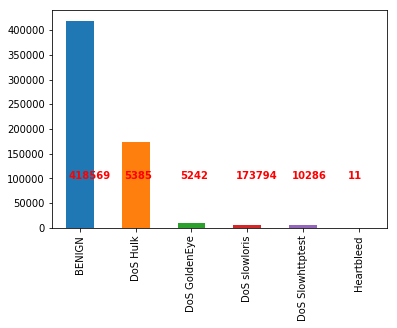

In [7]:
ax = df_nodup[' Label'].value_counts().plot(kind='bar')
for i in range(len(labels)):
    ax.text(i-0.2,100000, str(lb_count[i]), color='red', fontweight='bold')

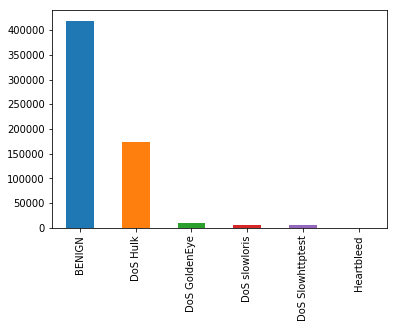

In [8]:
df_nodup[' Label'].value_counts().plot(kind='bar')

In [9]:
df_benign = df_nodup[(df_nodup[' Label']=='BENIGN')]
df_benign

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058824,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,389,433,11,4,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,88,1088,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,80,579225,132,150,160,320799,160,0,1.212121,13.926212,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,49666,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,49413,4,3,0,18,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


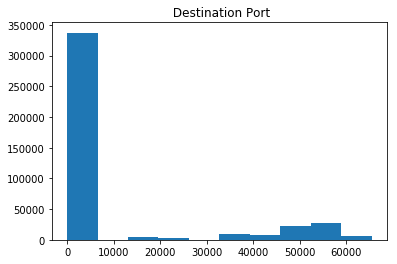

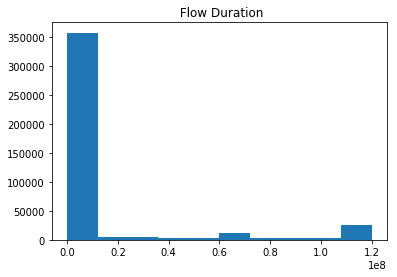

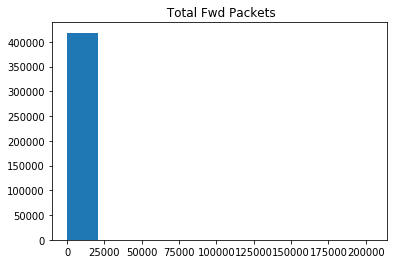

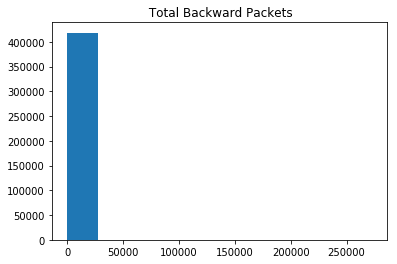

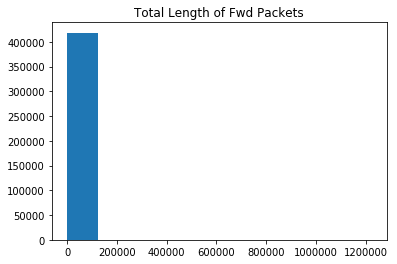

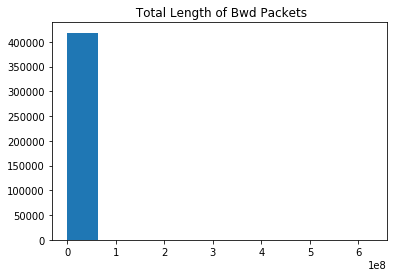

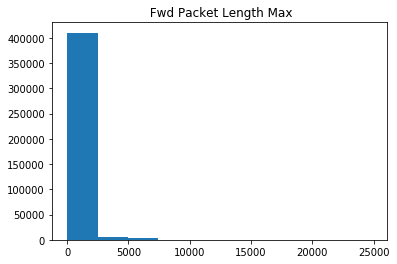

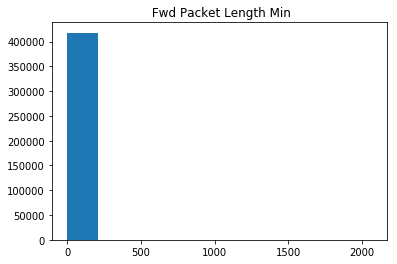

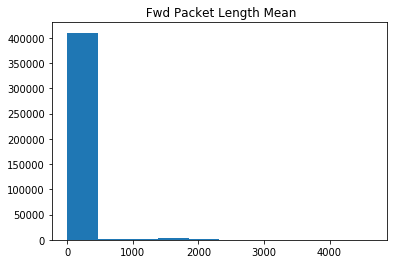

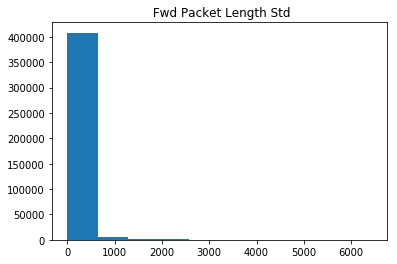

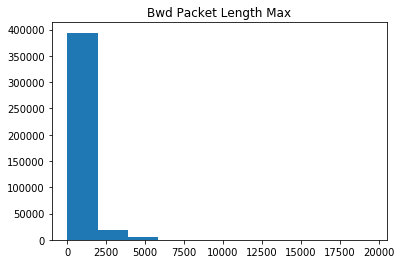

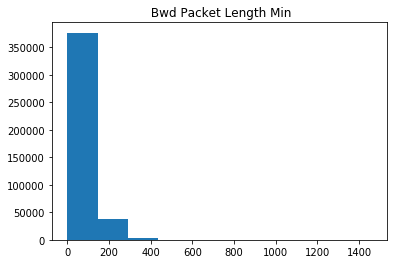

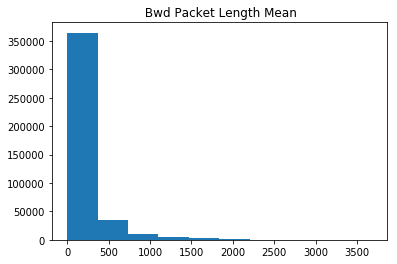

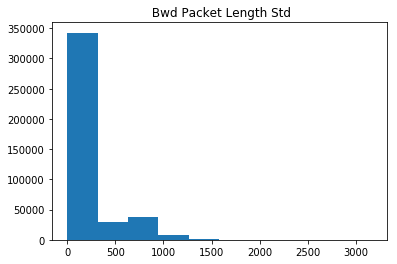

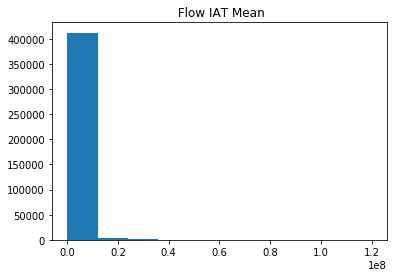

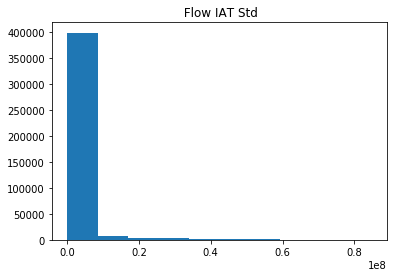

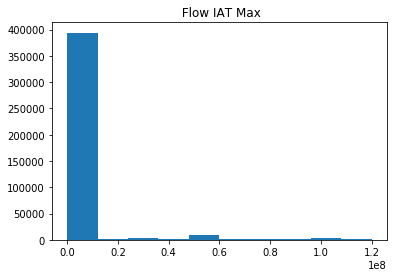

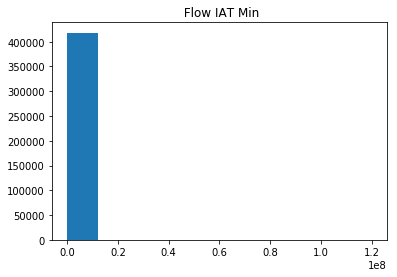

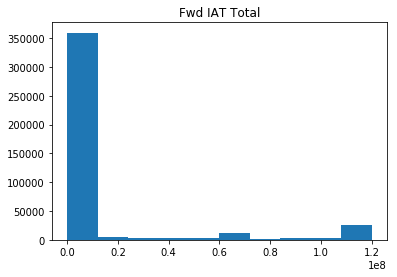

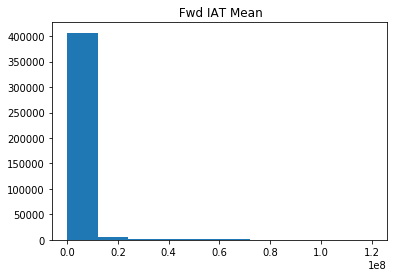

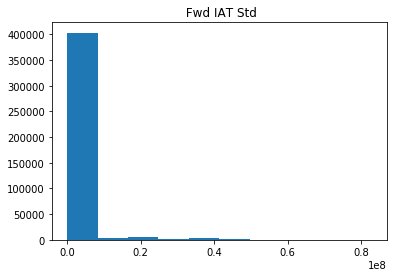

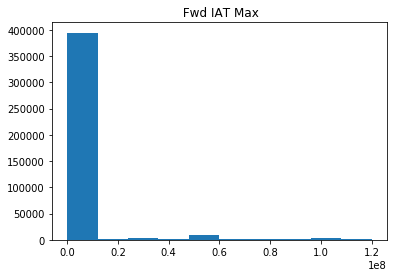

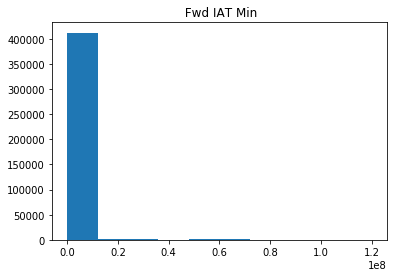

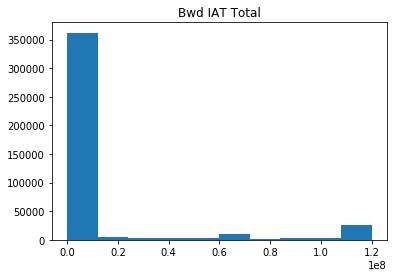

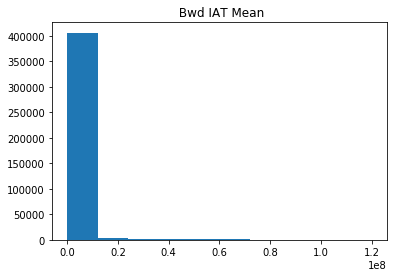

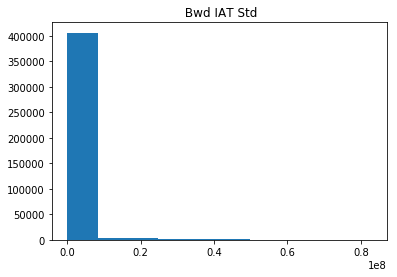

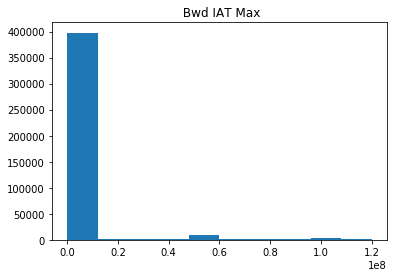

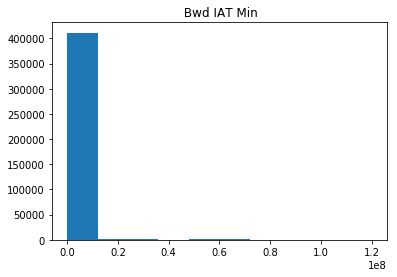

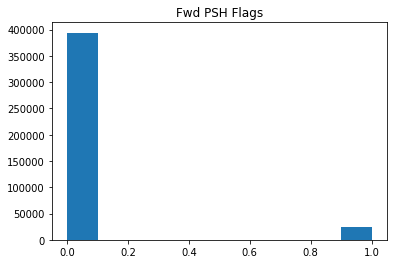

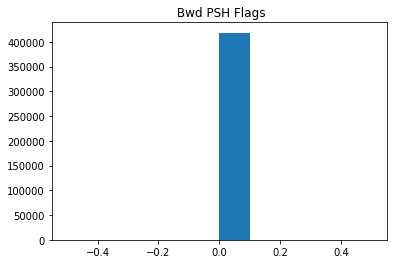

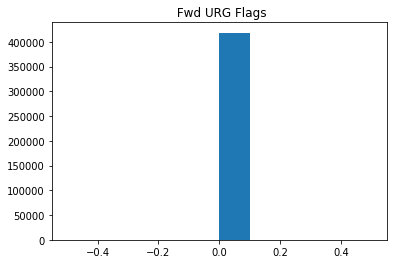

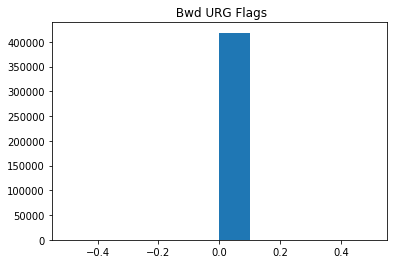

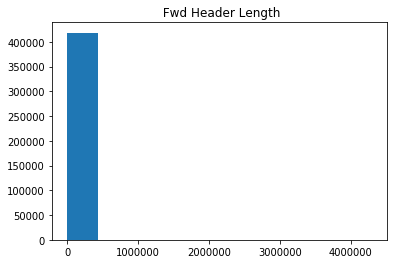

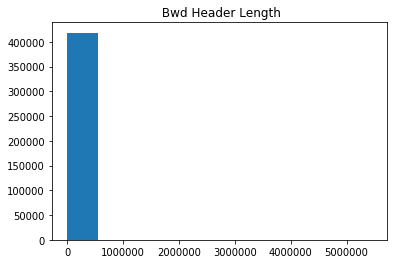

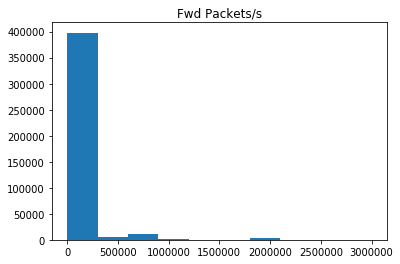

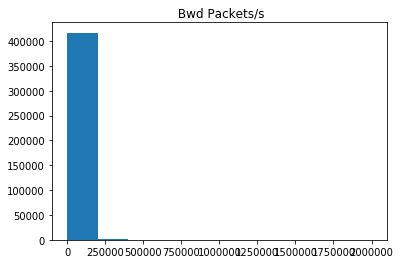

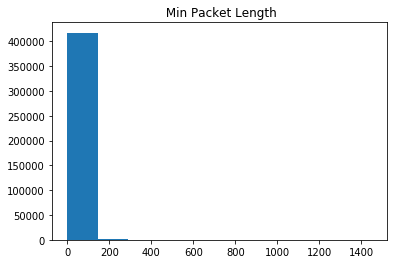

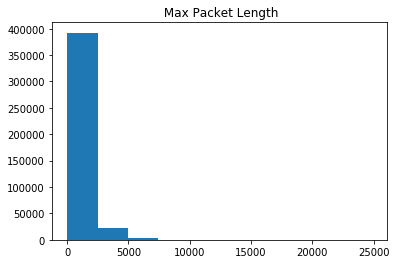

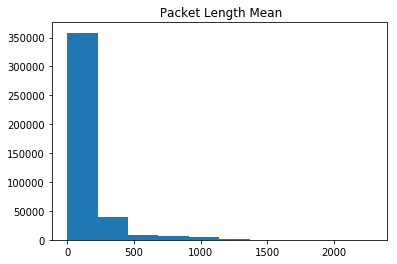

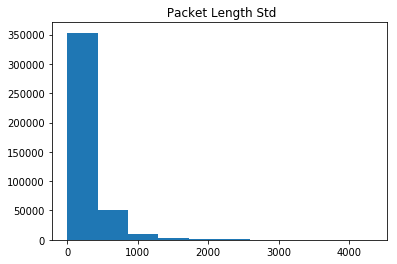

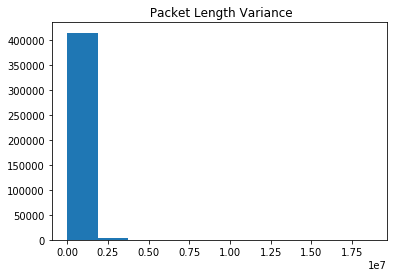

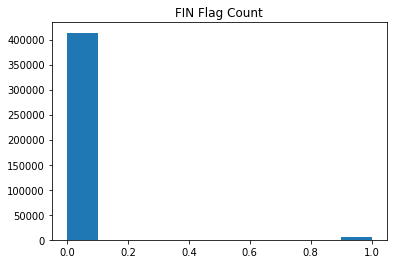

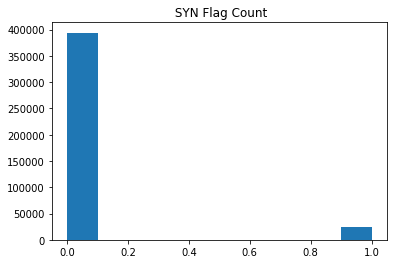

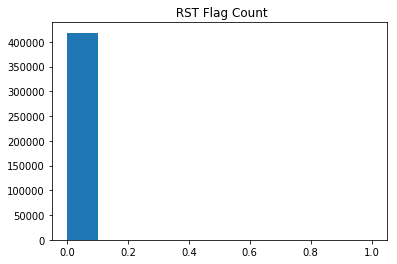

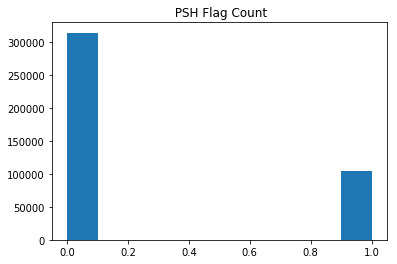

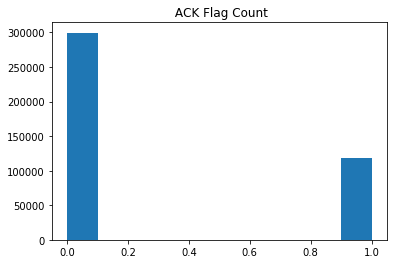

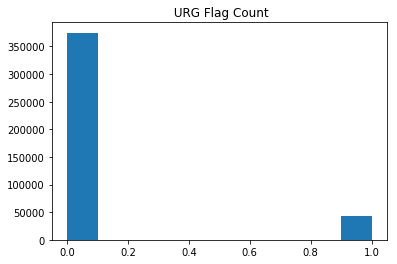

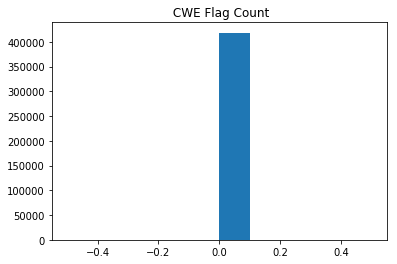

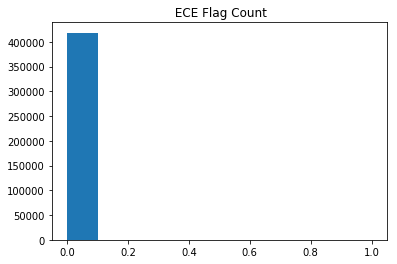

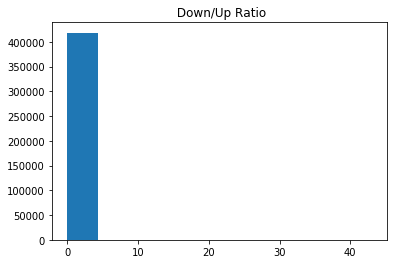

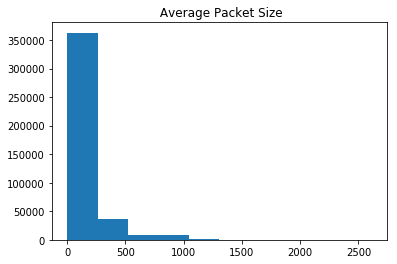

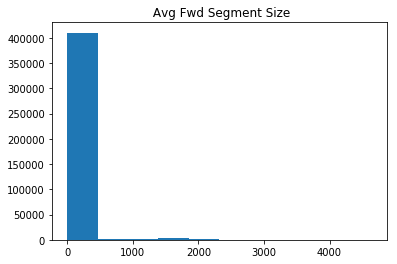

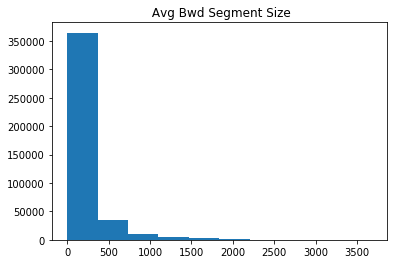

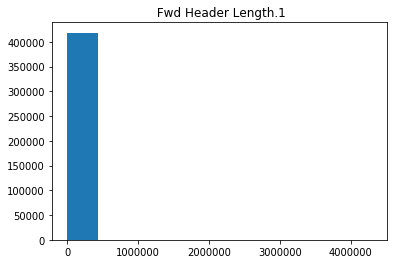

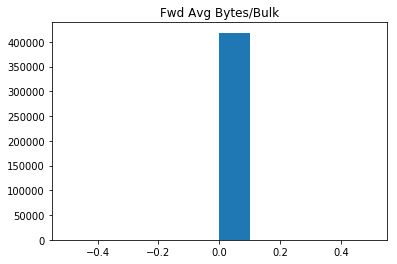

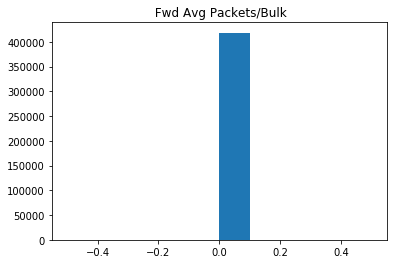

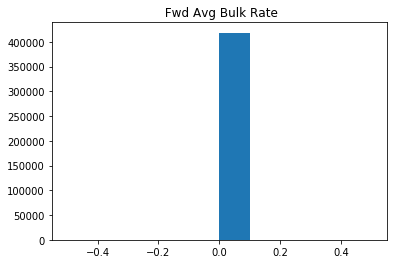

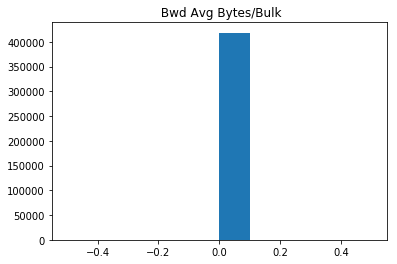

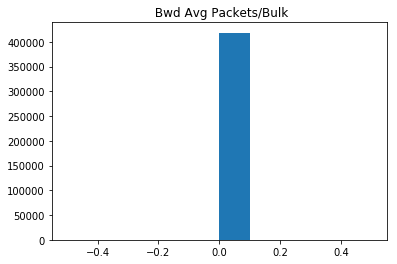

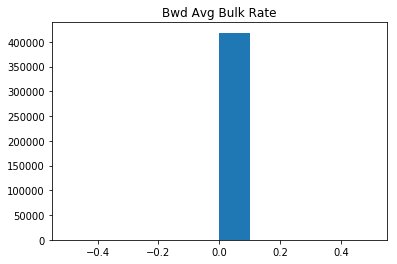

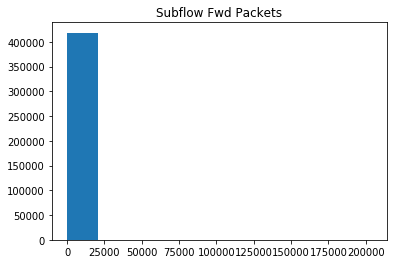

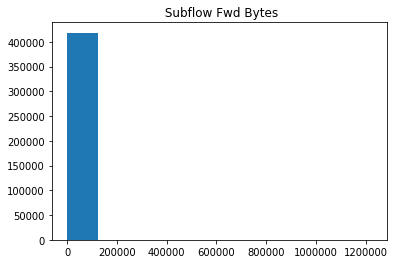

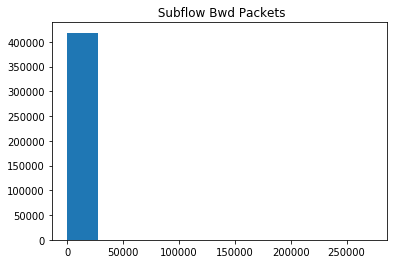

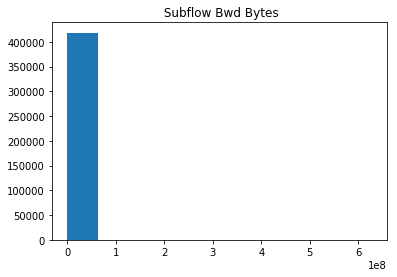

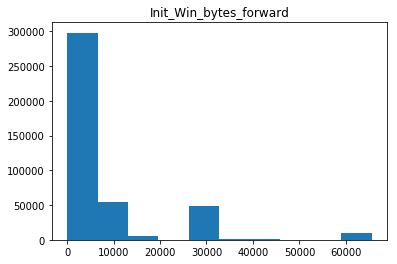

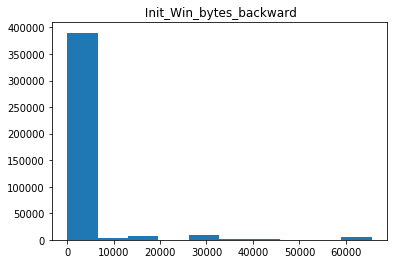

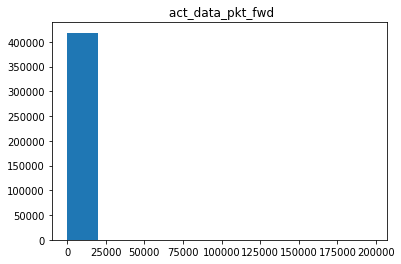

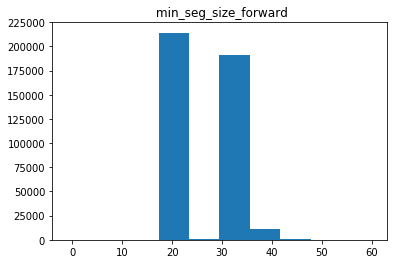

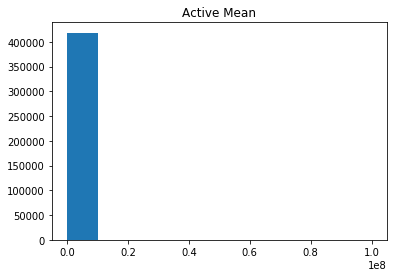

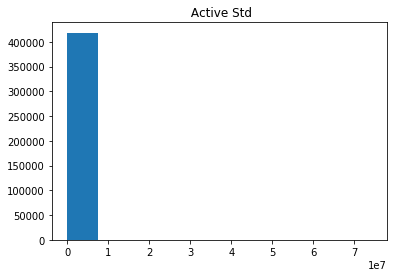

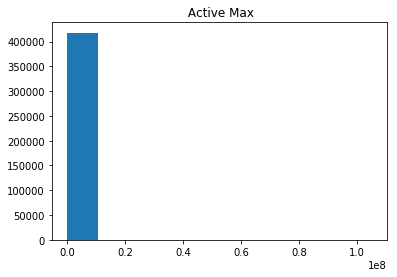

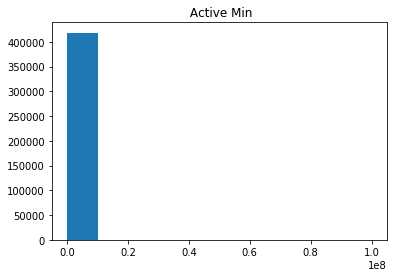

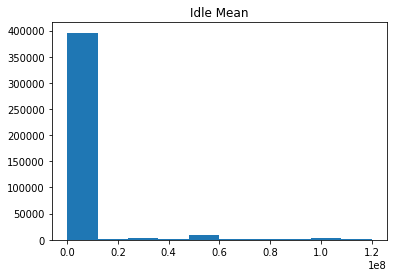

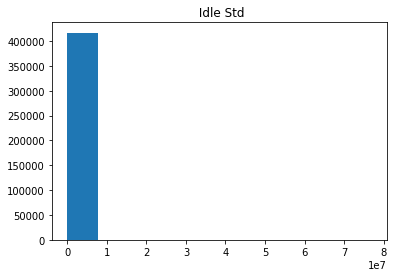

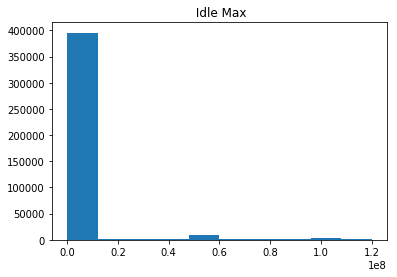

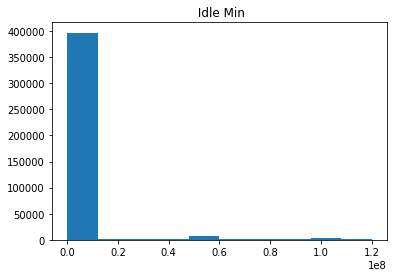

In [10]:
for colname in df_benign.columns:
    col = df_benign[colname]
    
    if col.dtypes in ['int64','float64']:
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

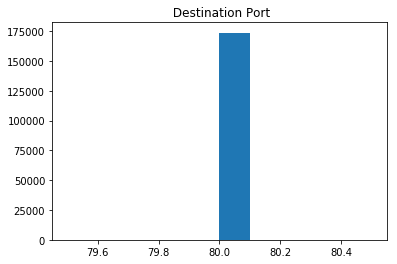

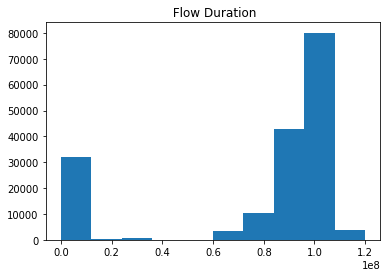

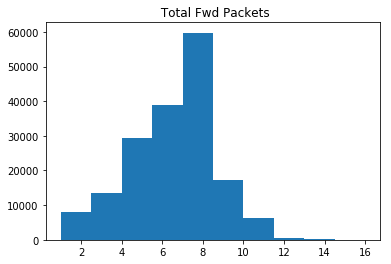

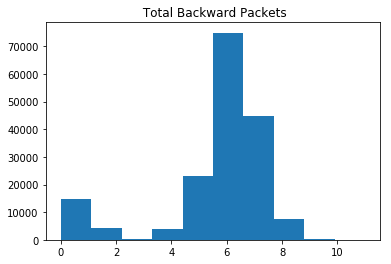

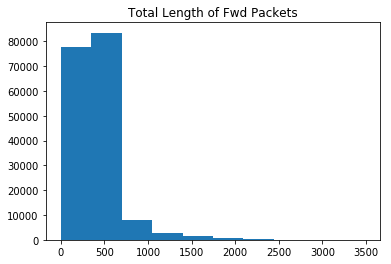

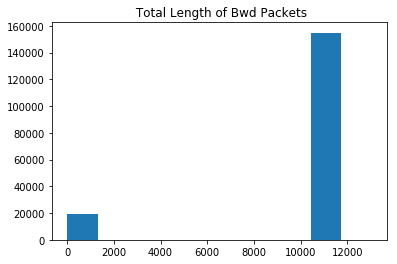

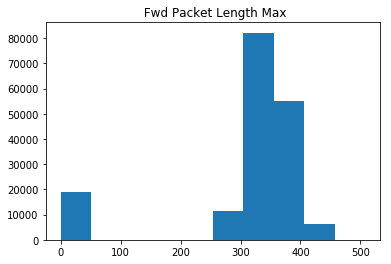

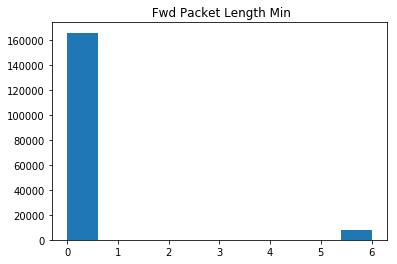

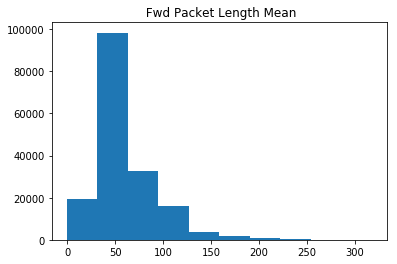

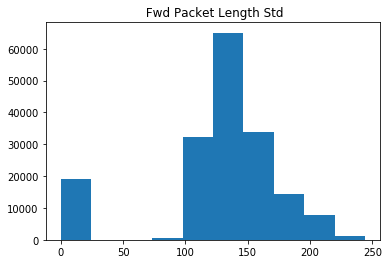

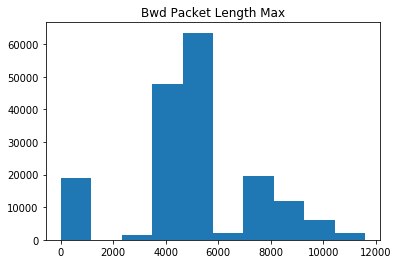

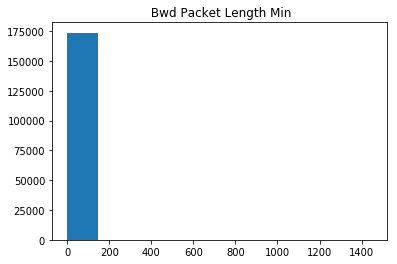

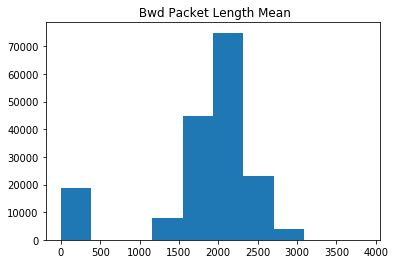

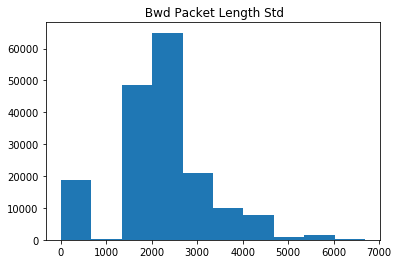

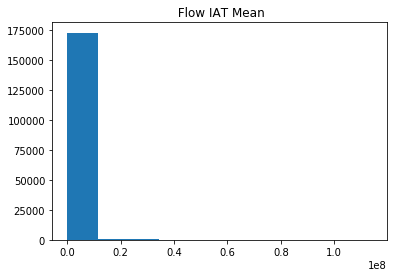

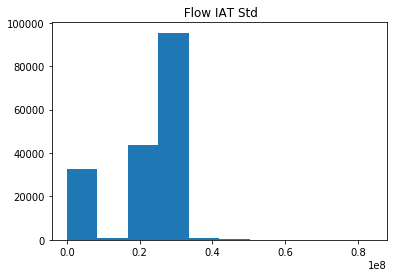

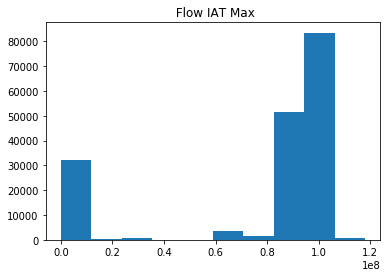

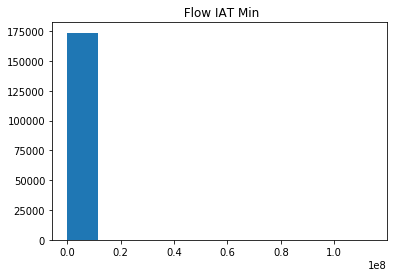

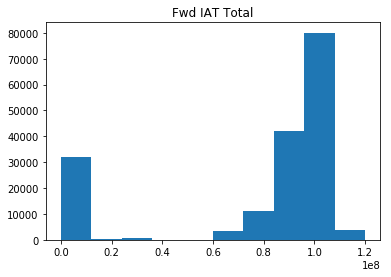

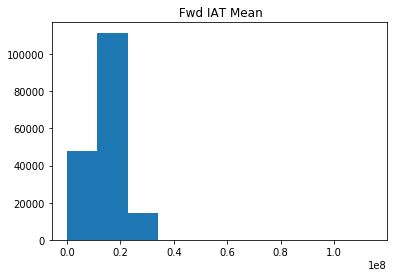

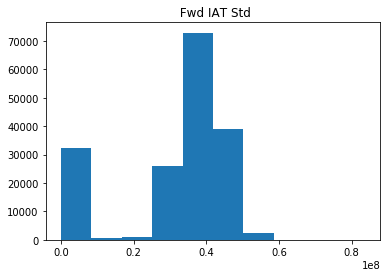

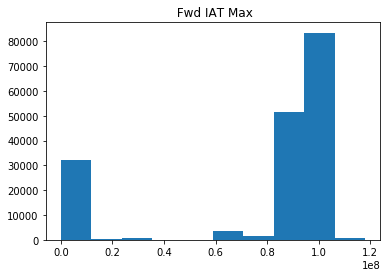

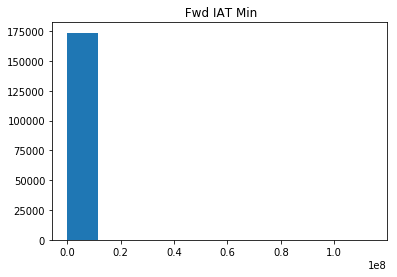

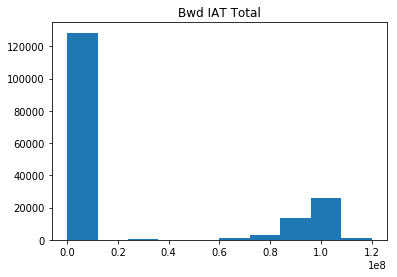

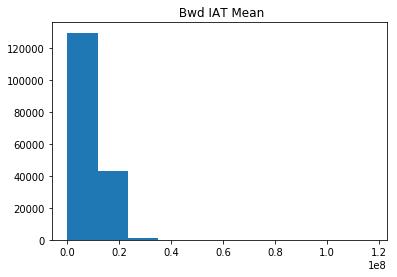

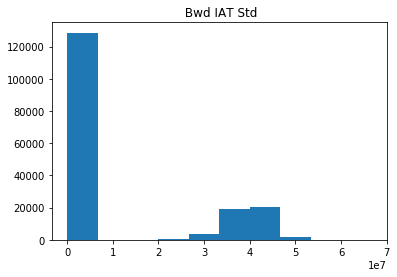

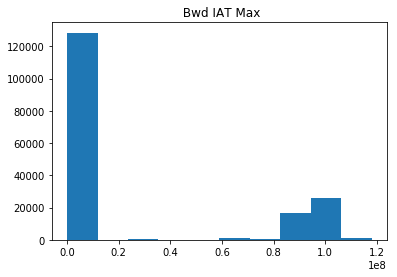

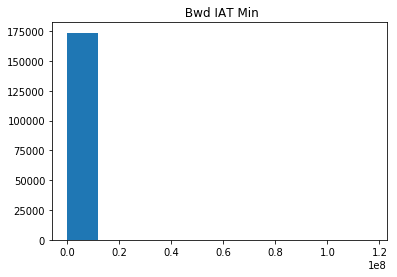

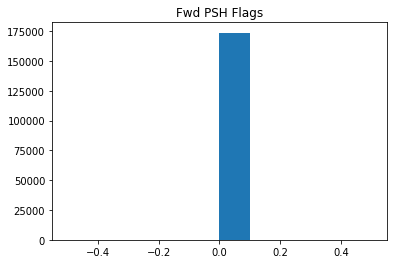

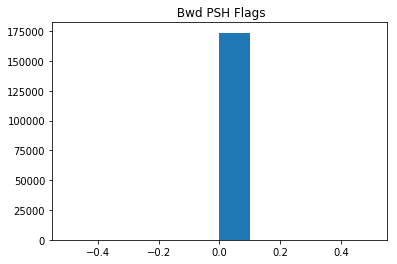

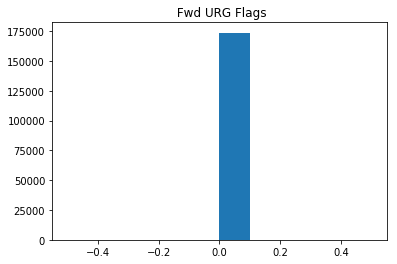

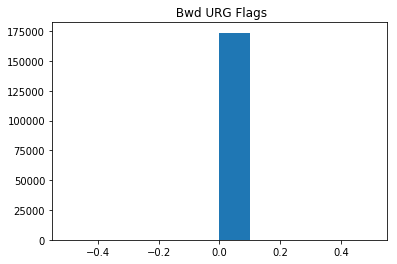

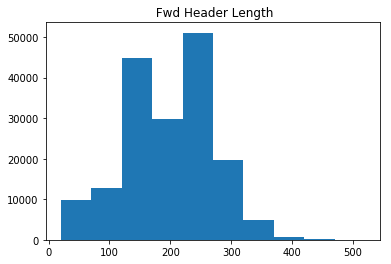

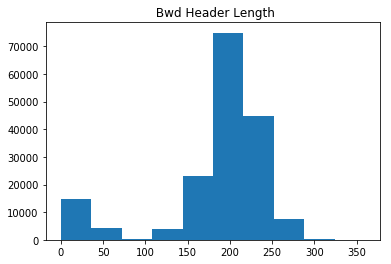

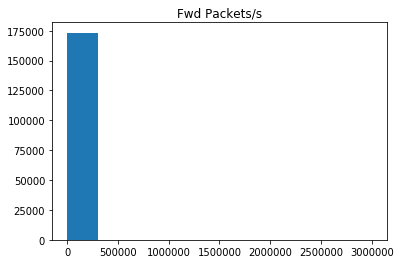

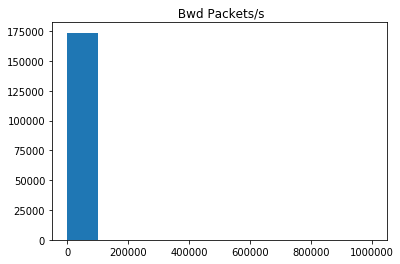

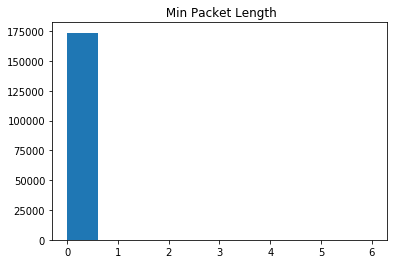

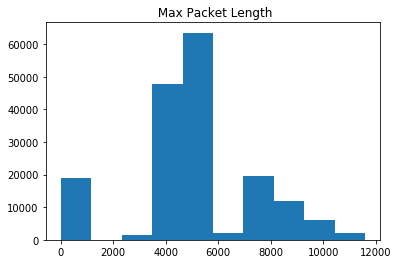

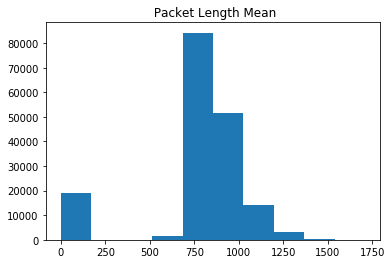

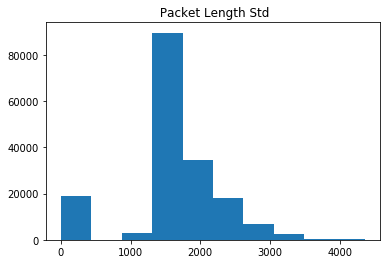

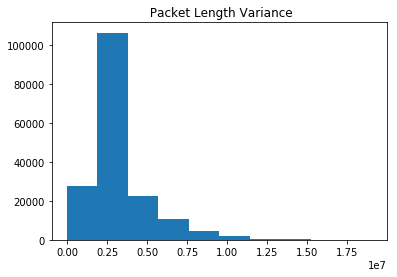

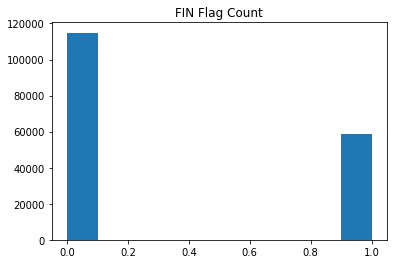

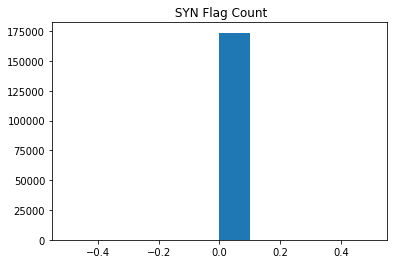

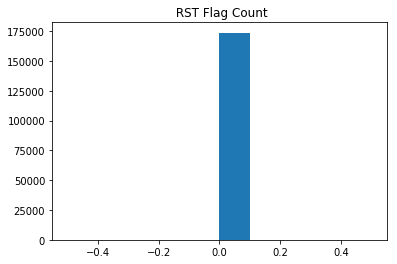

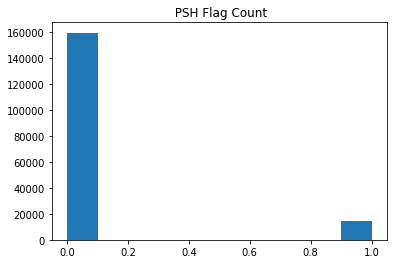

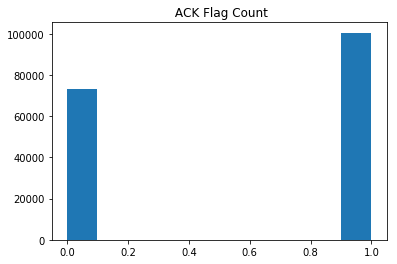

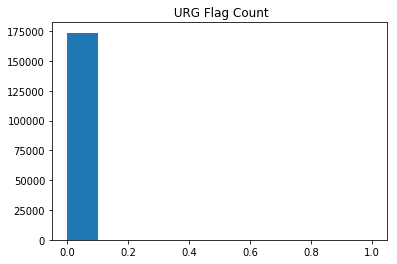

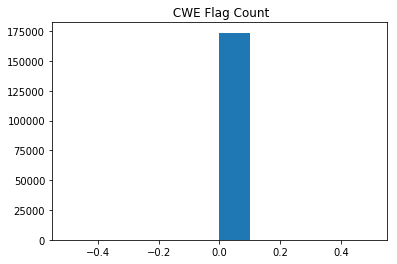

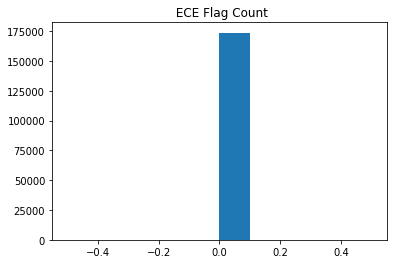

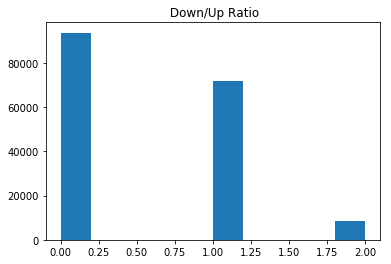

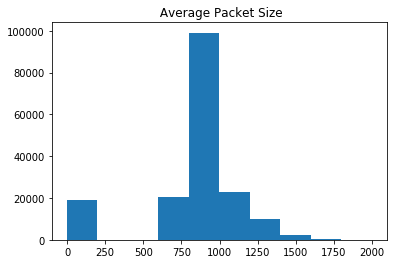

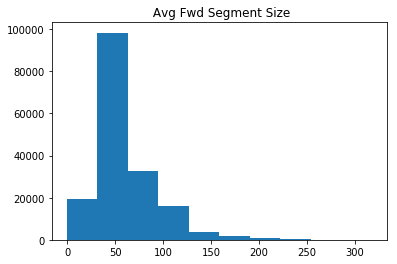

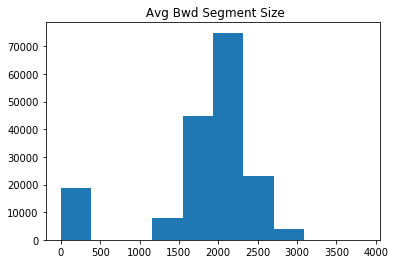

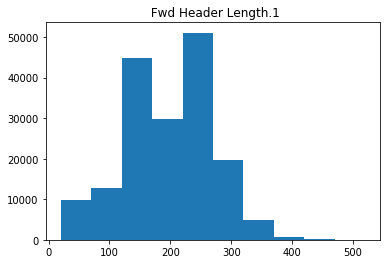

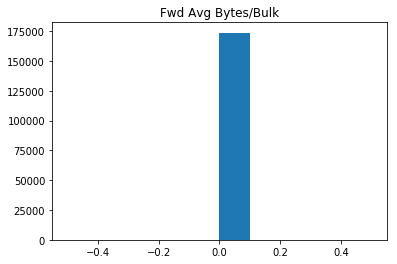

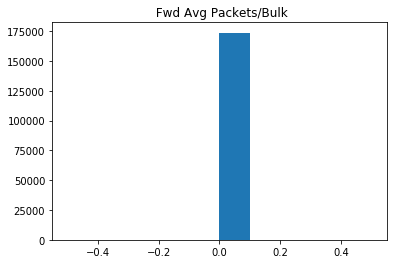

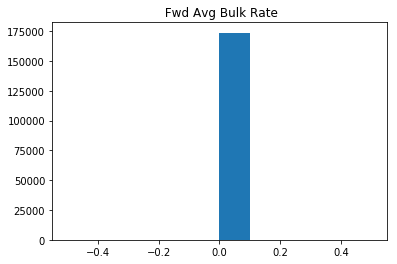

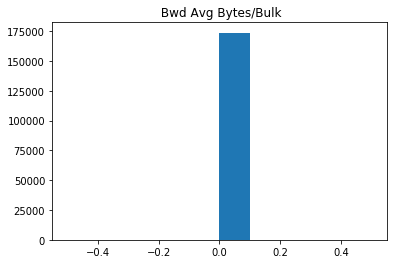

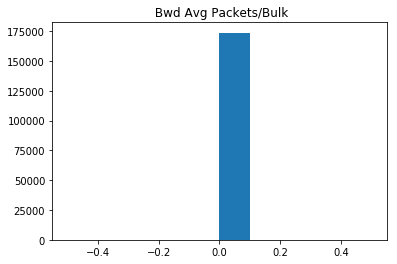

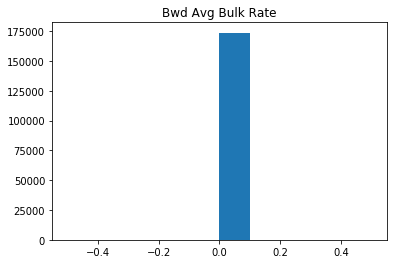

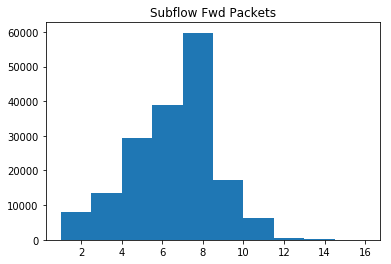

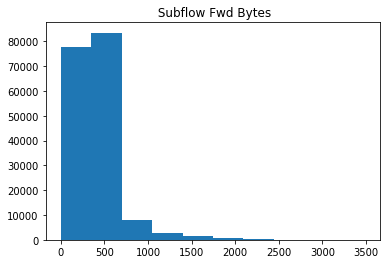

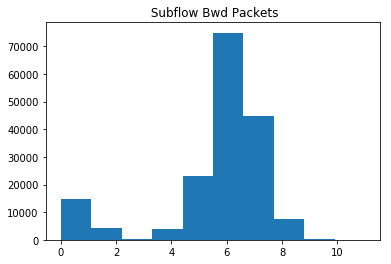

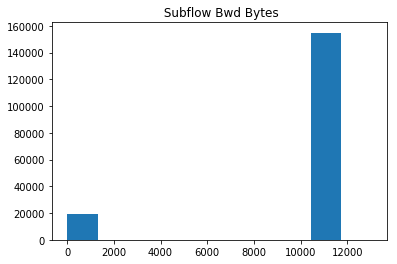

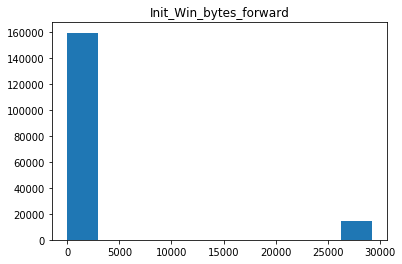

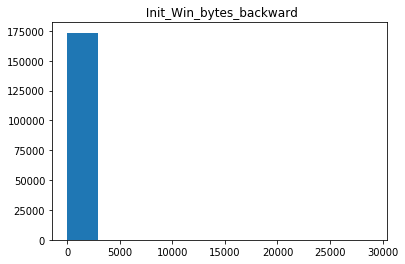

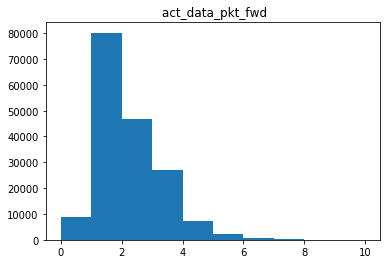

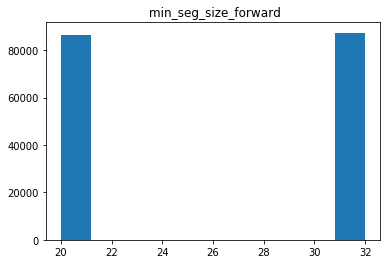

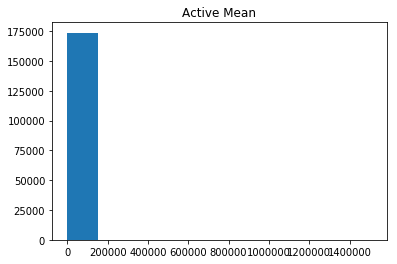

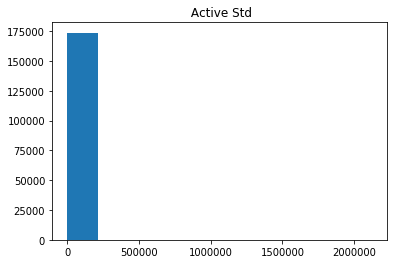

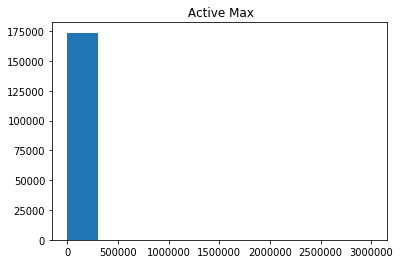

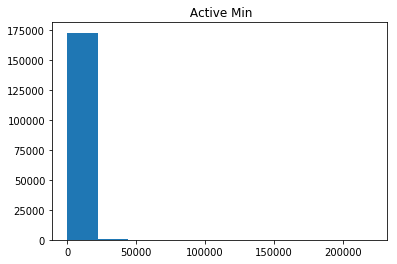

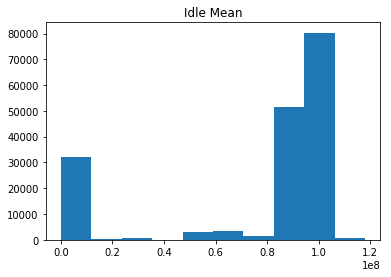

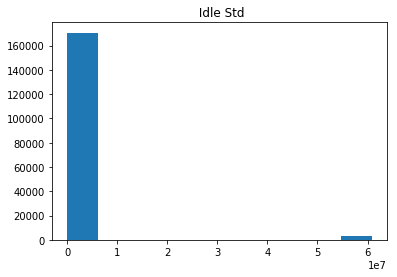

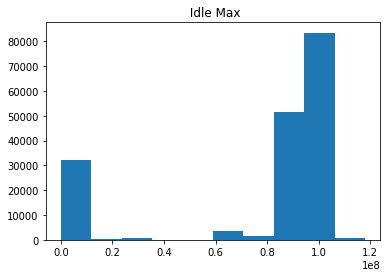

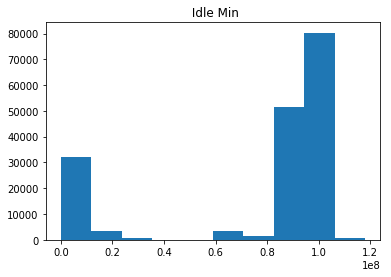

In [11]:
df_doshulk = df_nodup[(df_nodup[' Label']=='DoS Hulk')]
for colname in df_doshulk.columns:
    col = df_doshulk[colname]
    
    if col.dtypes in ['int64','float64']:
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

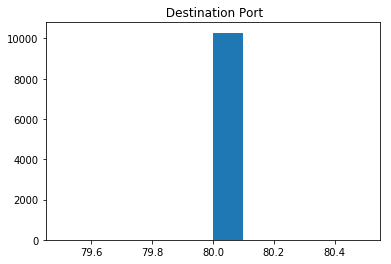

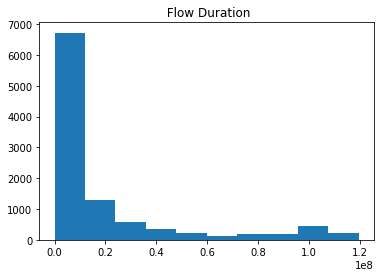

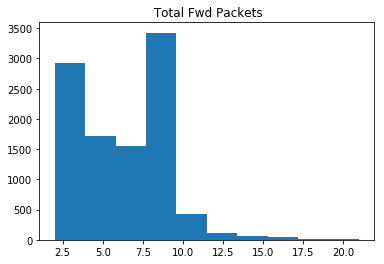

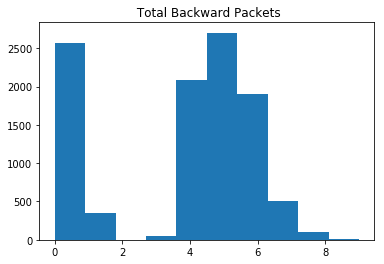

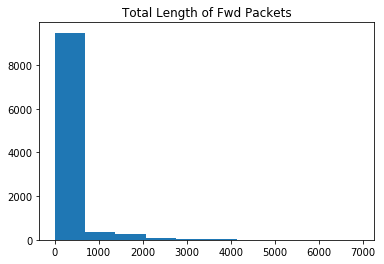

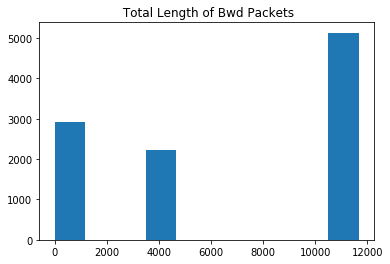

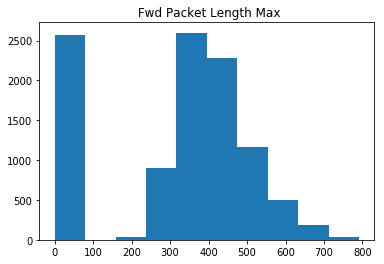

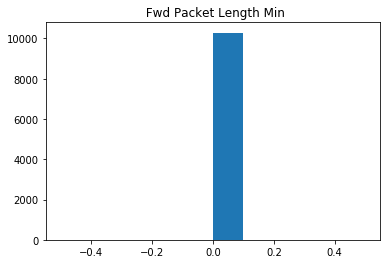

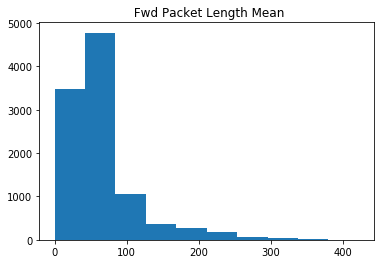

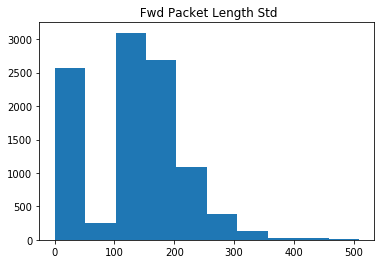

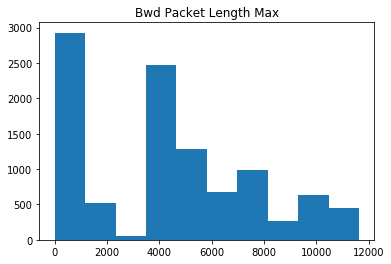

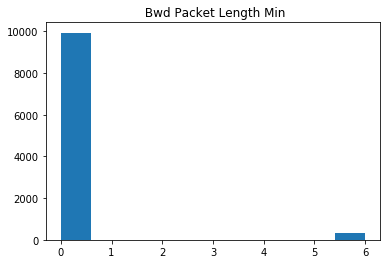

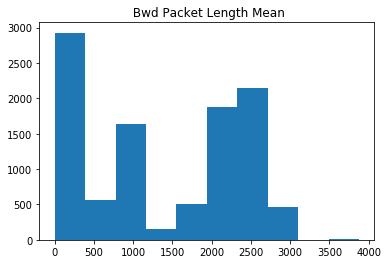

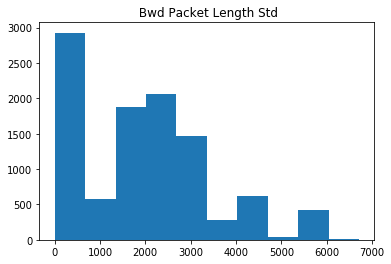

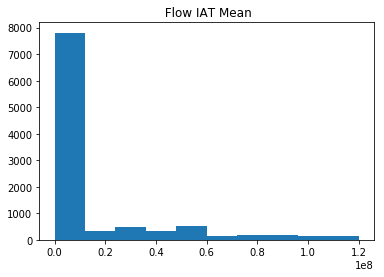

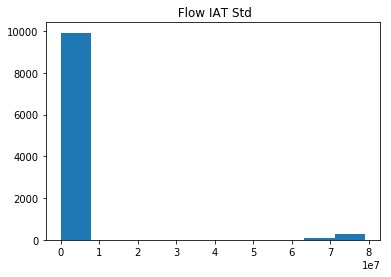

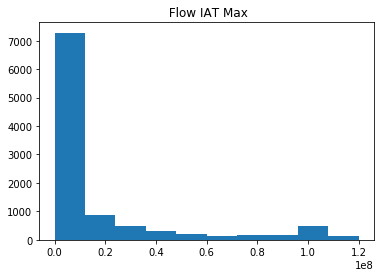

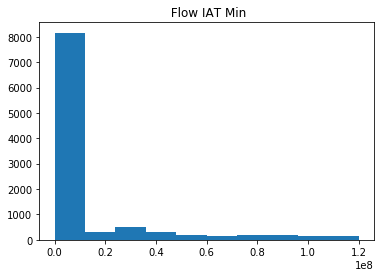

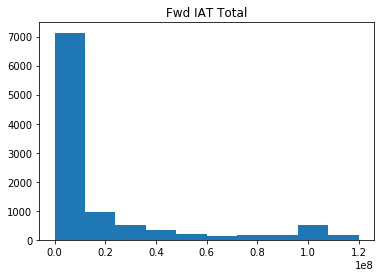

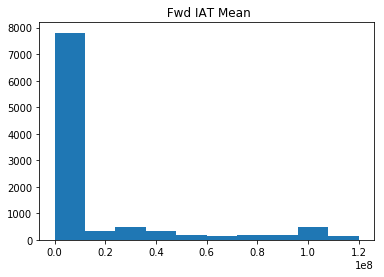

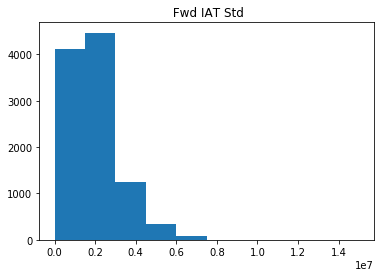

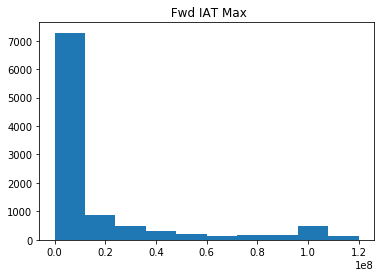

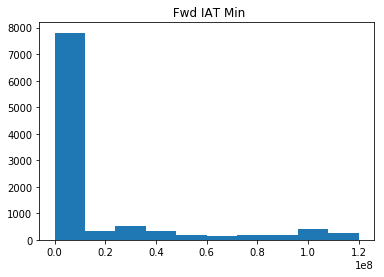

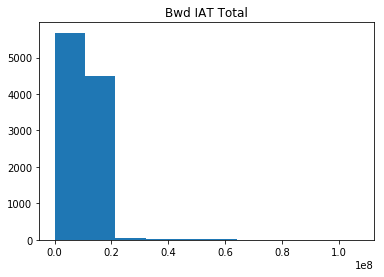

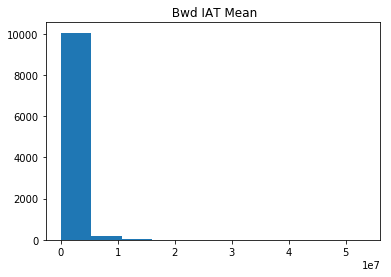

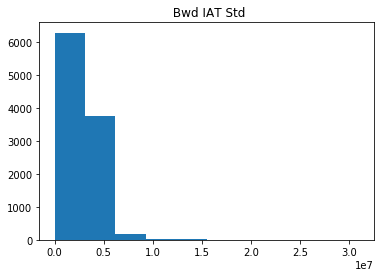

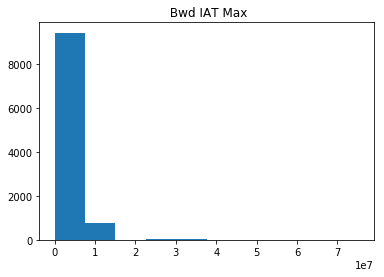

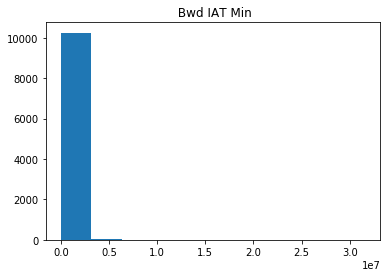

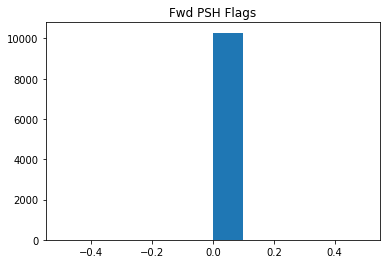

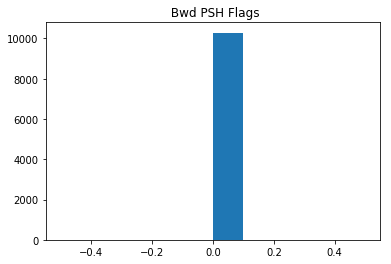

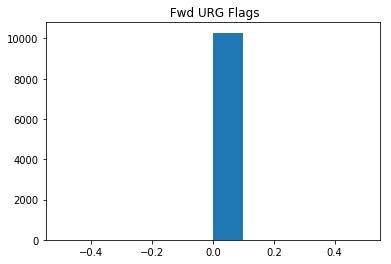

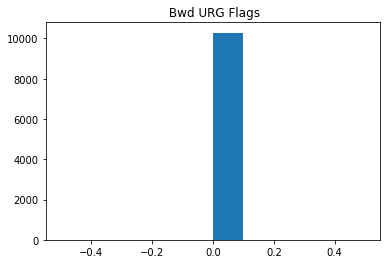

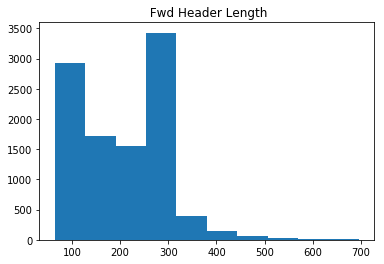

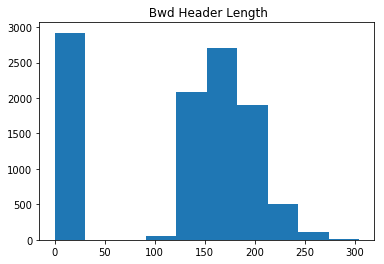

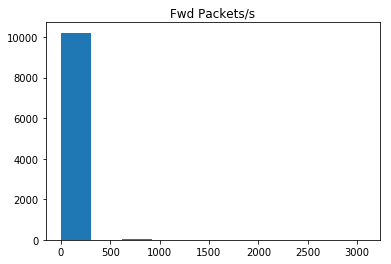

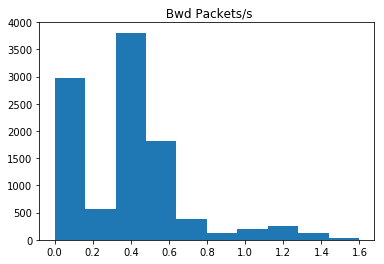

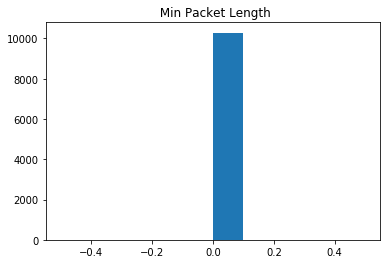

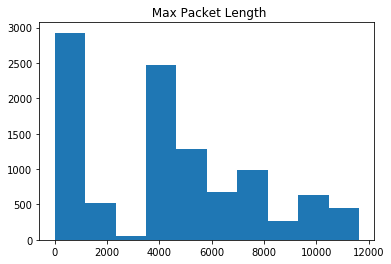

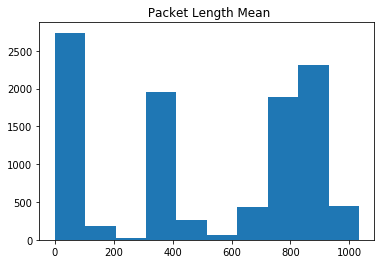

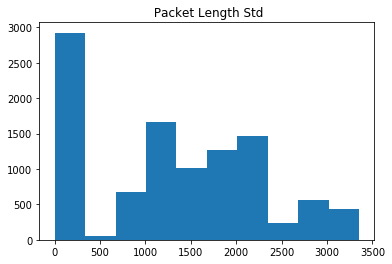

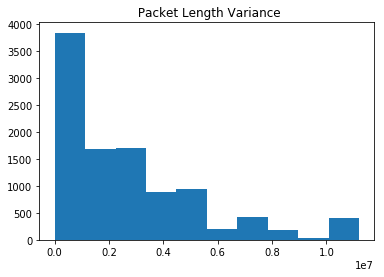

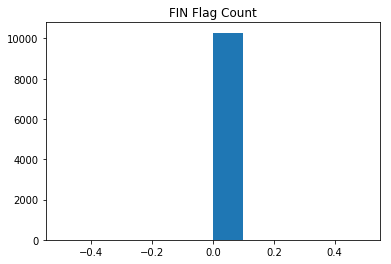

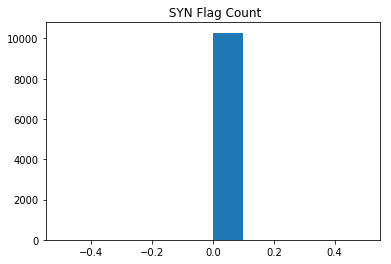

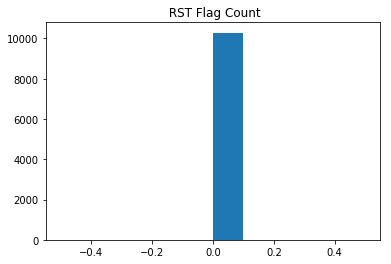

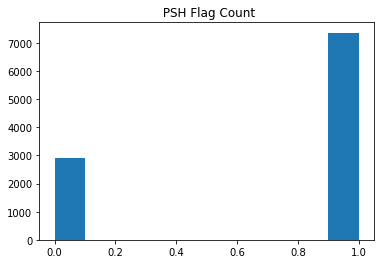

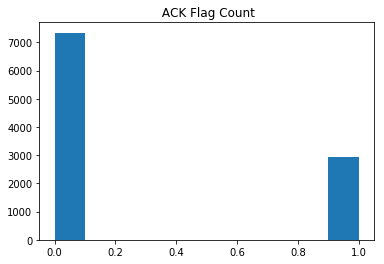

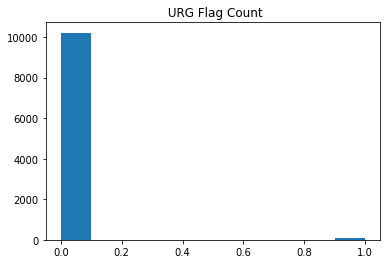

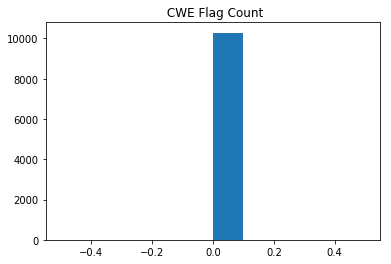

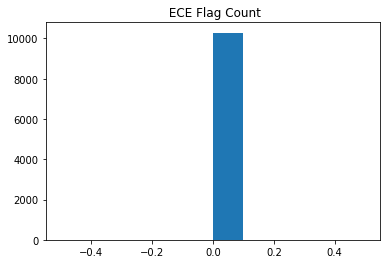

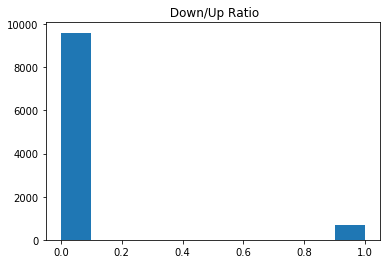

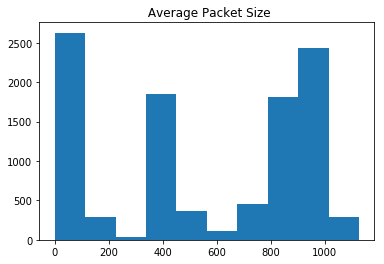

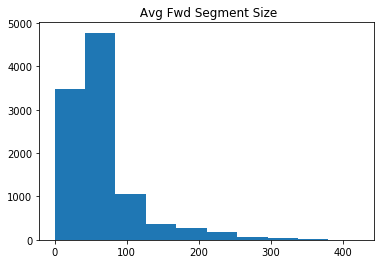

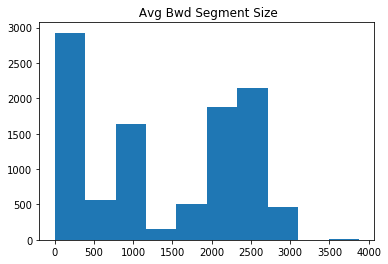

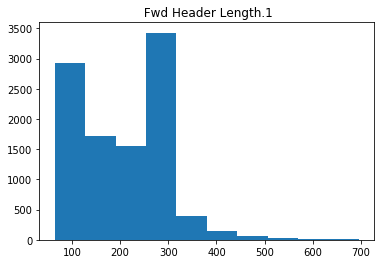

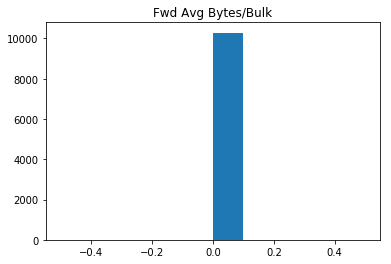

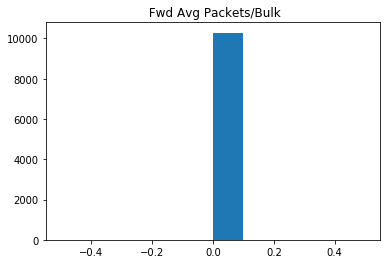

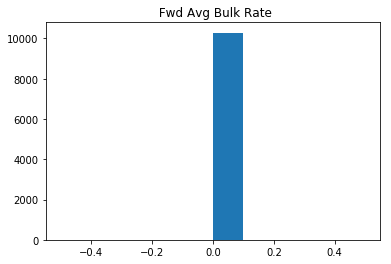

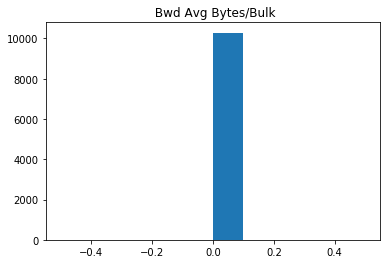

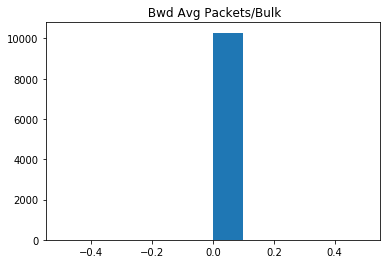

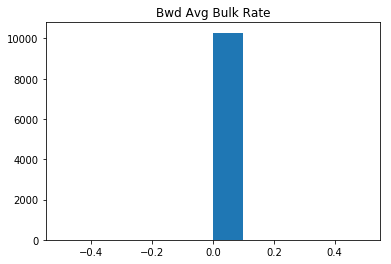

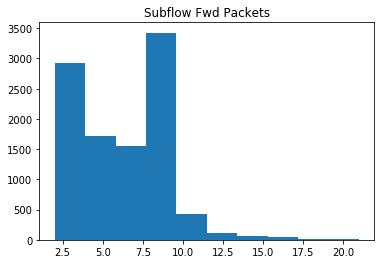

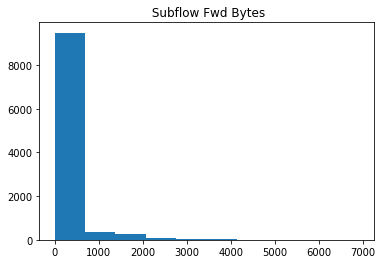

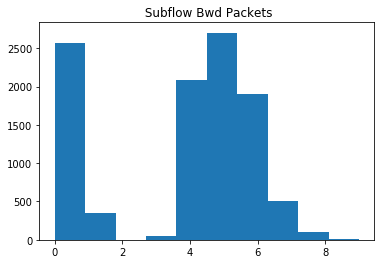

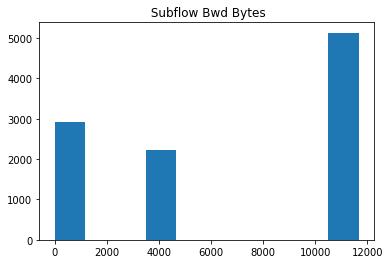

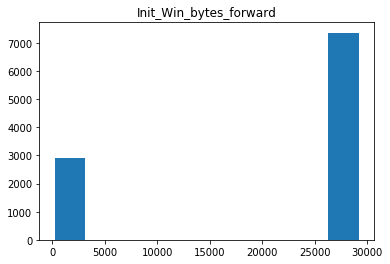

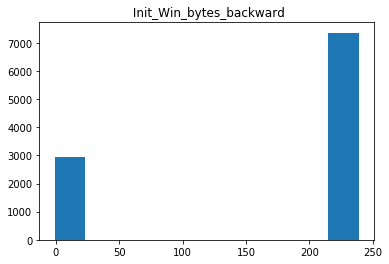

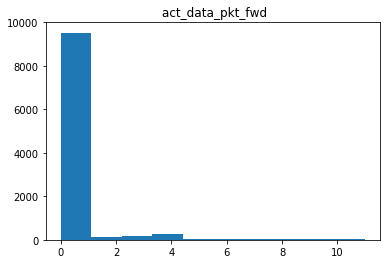

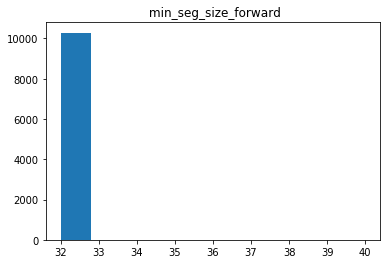

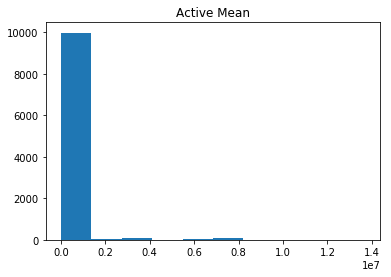

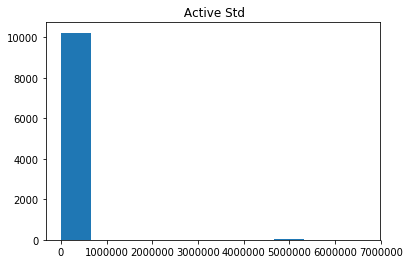

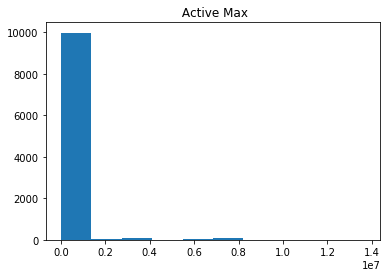

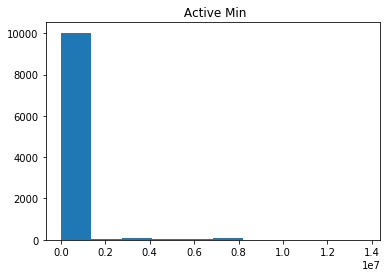

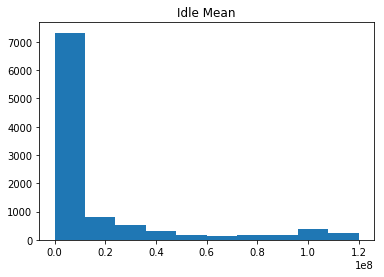

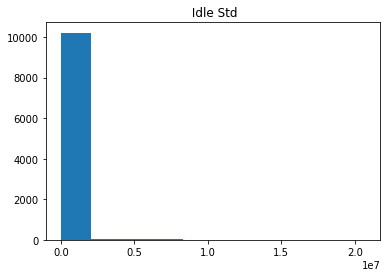

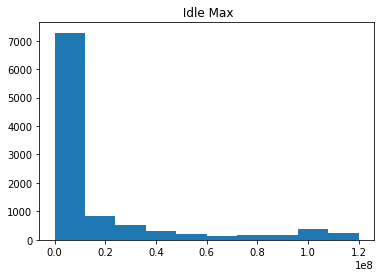

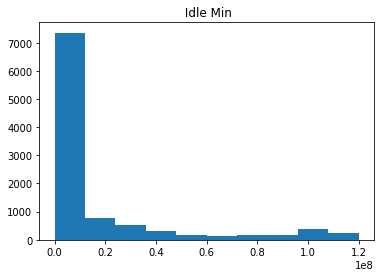

In [12]:
df_dosgold = df_nodup[(df_nodup[' Label']=='DoS GoldenEye')]
for colname in df_dosgold.columns:
    col = df_dosgold[colname]
    
    if col.dtypes in ['int64','float64']:
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

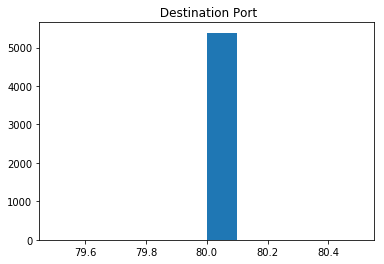

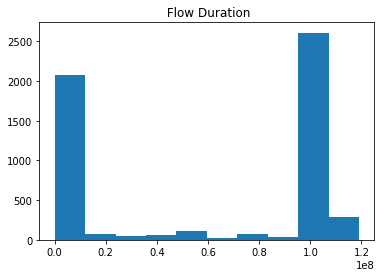

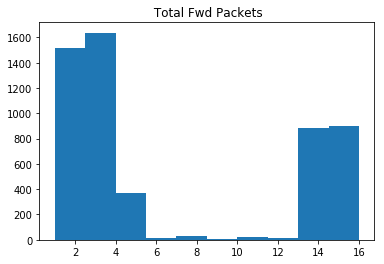

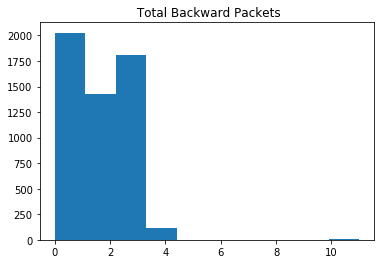

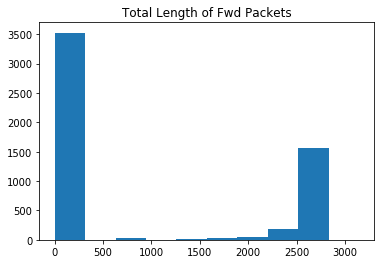

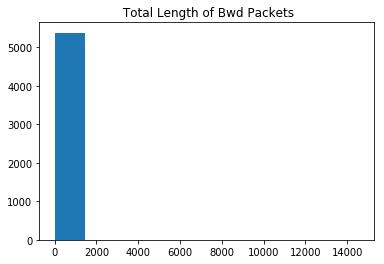

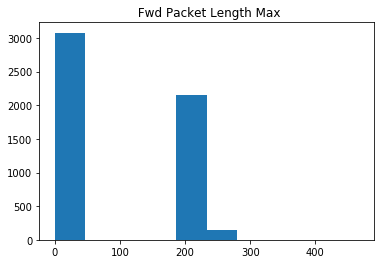

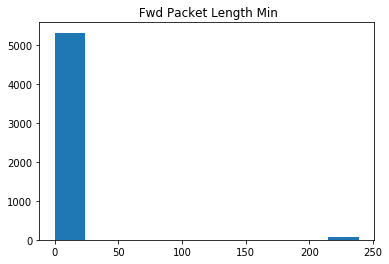

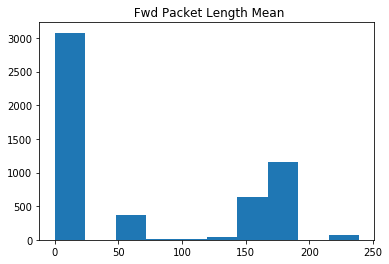

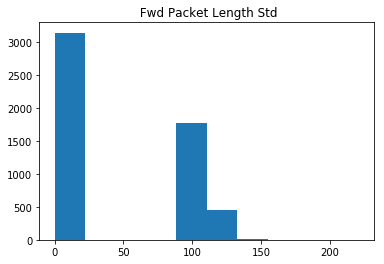

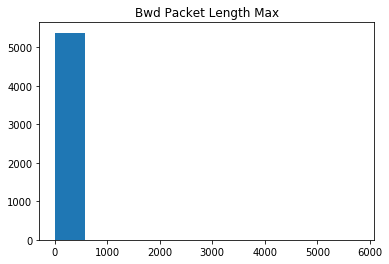

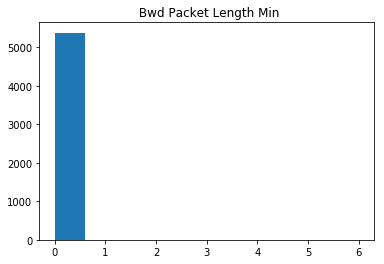

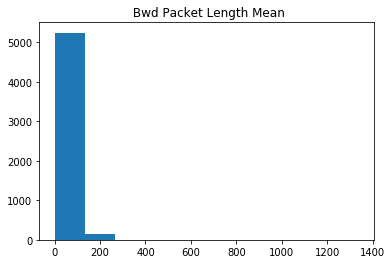

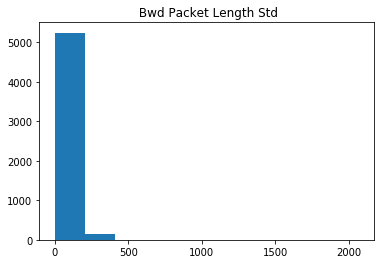

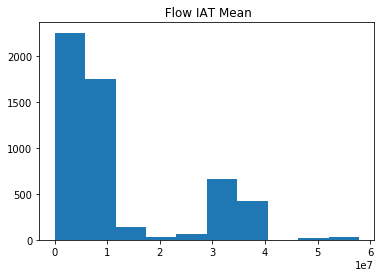

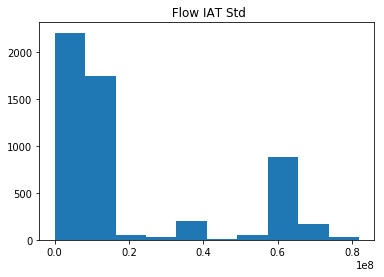

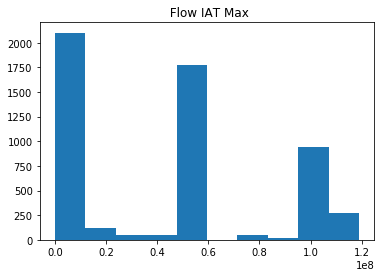

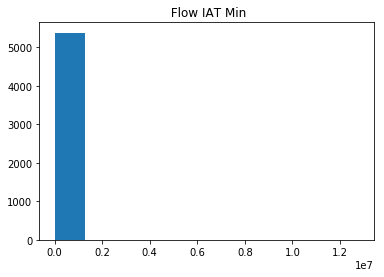

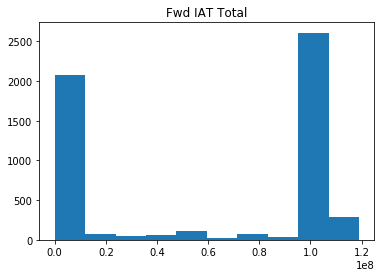

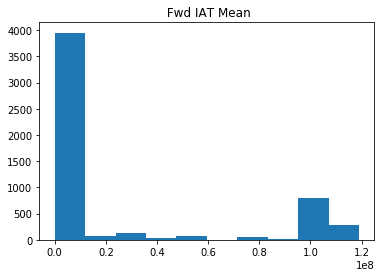

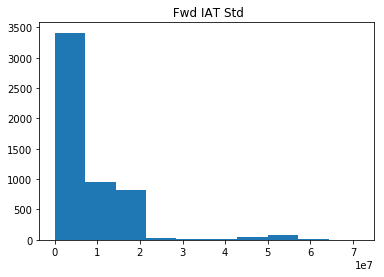

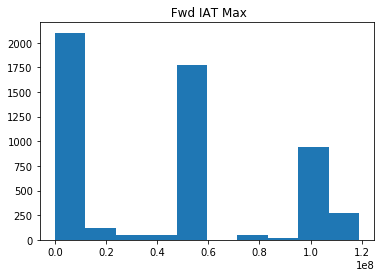

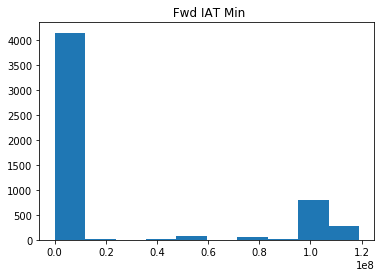

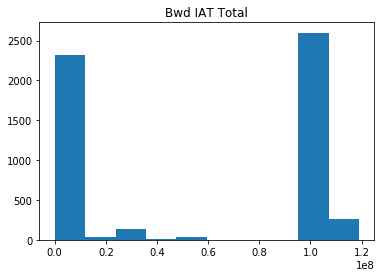

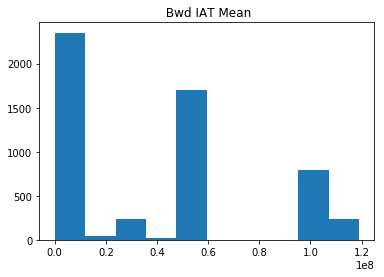

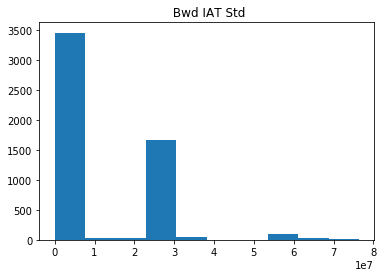

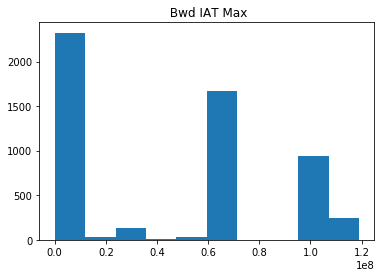

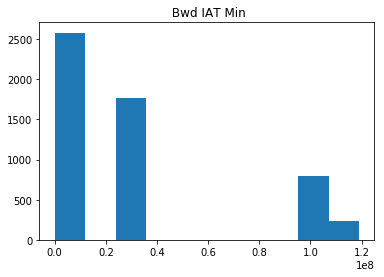

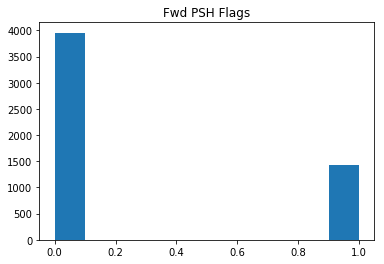

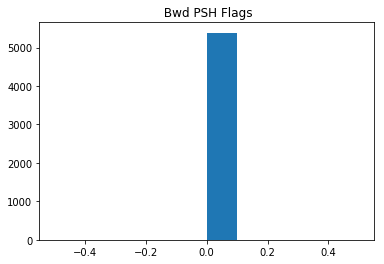

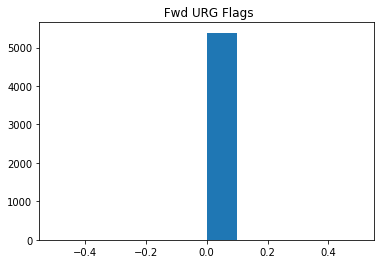

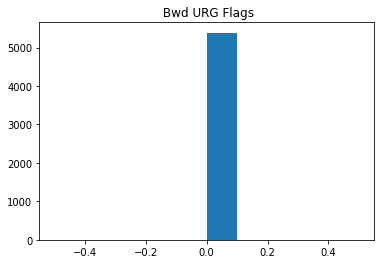

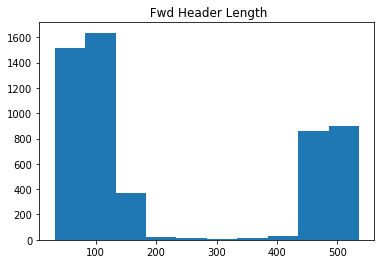

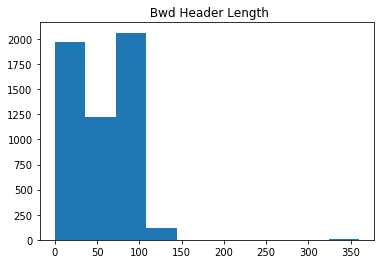

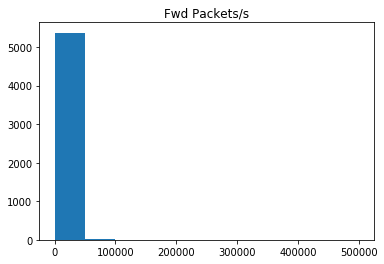

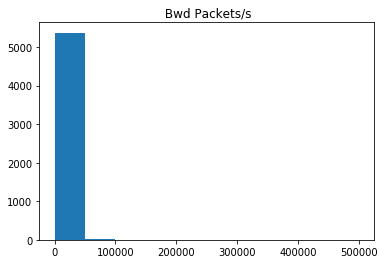

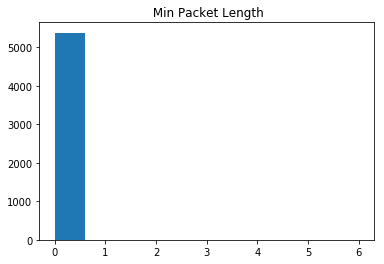

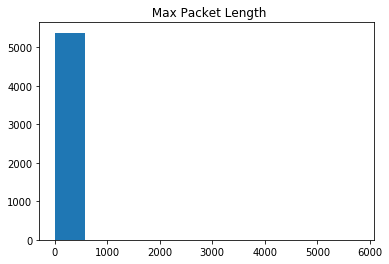

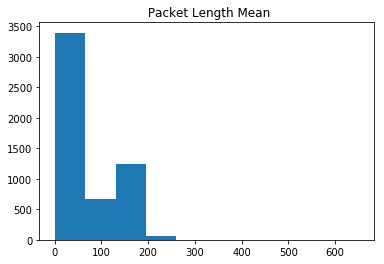

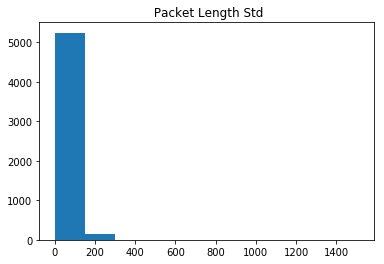

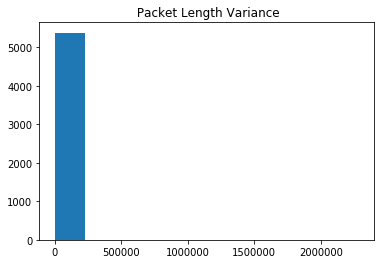

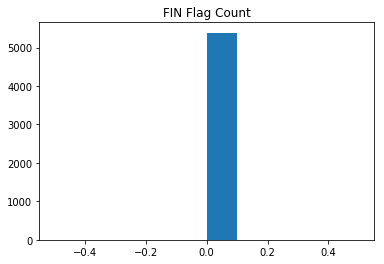

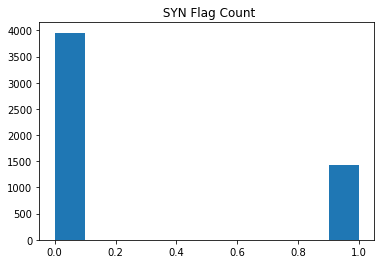

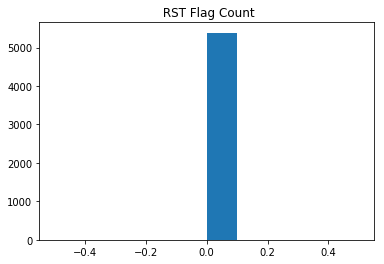

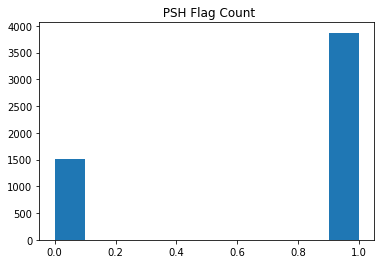

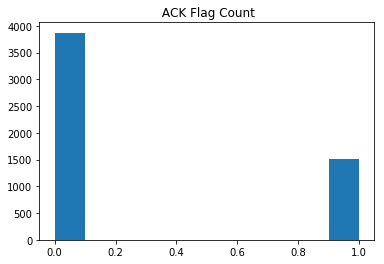

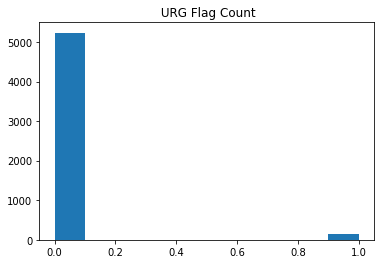

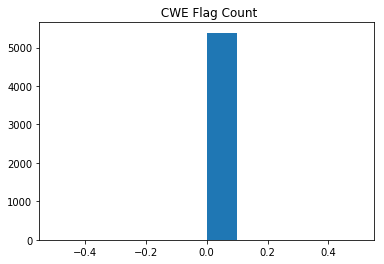

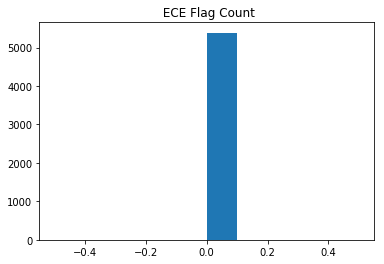

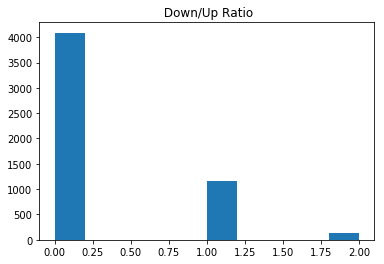

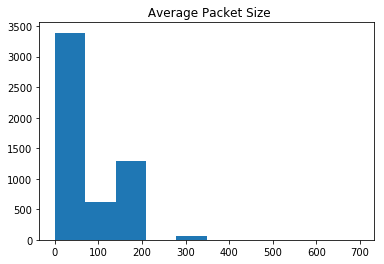

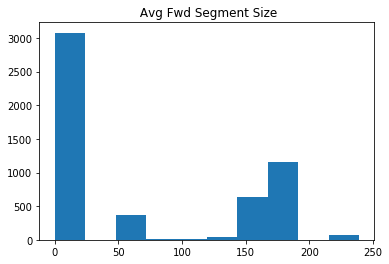

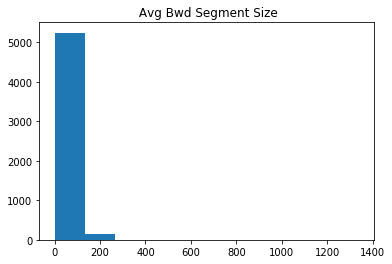

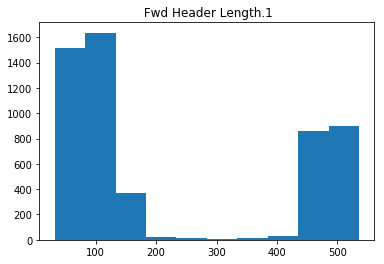

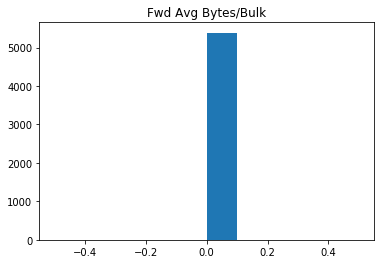

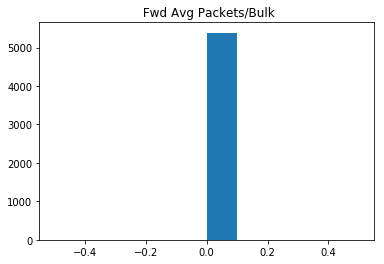

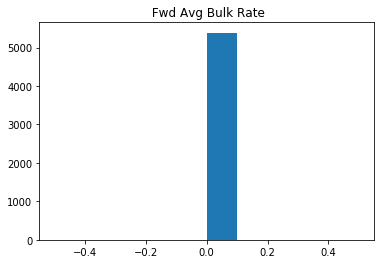

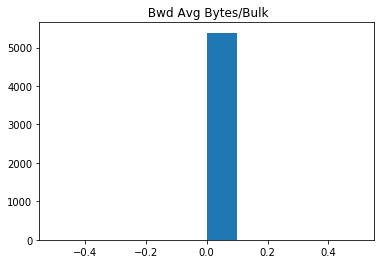

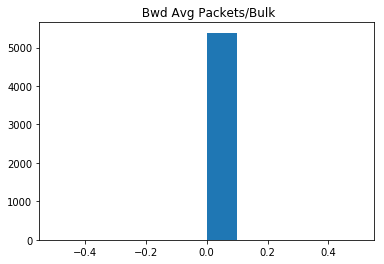

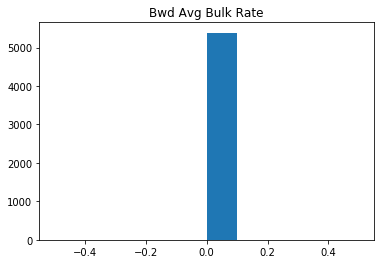

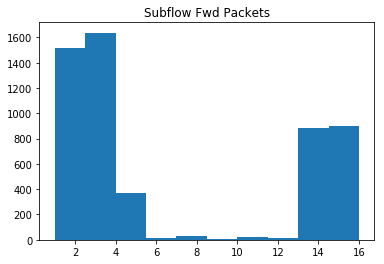

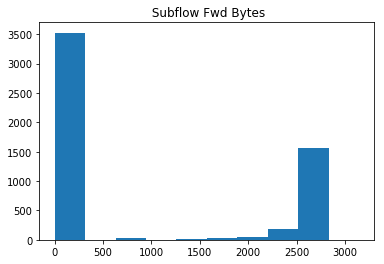

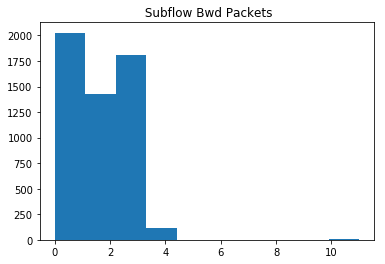

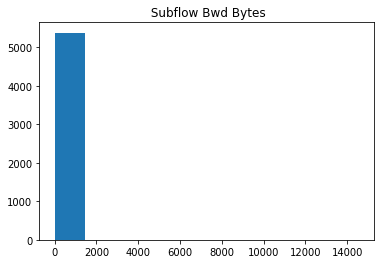

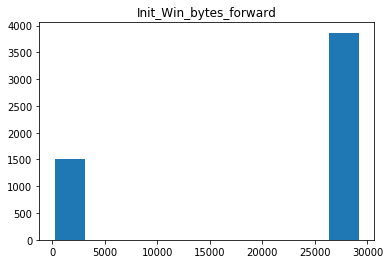

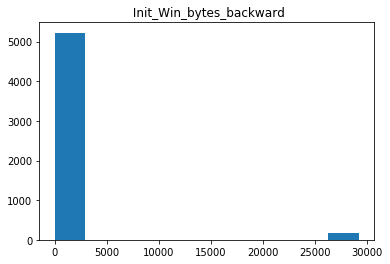

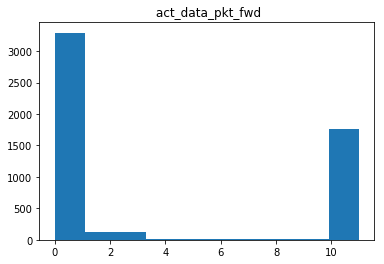

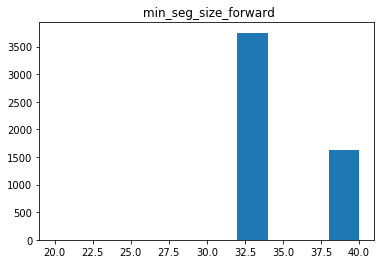

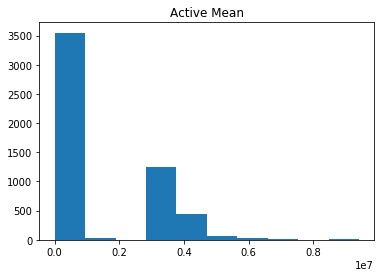

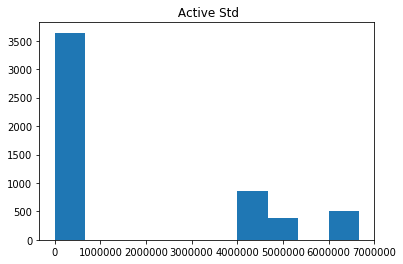

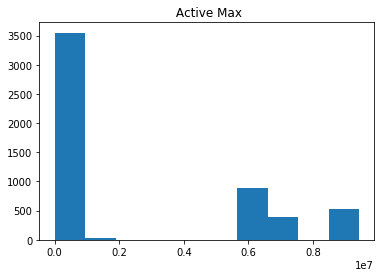

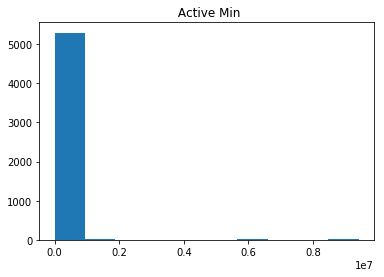

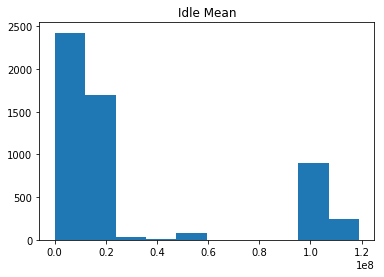

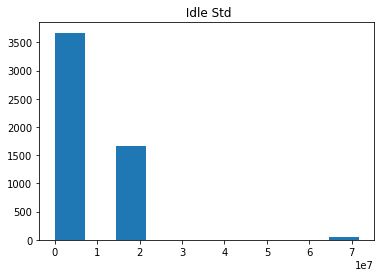

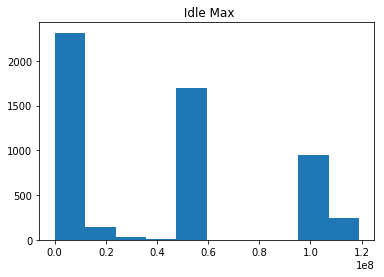

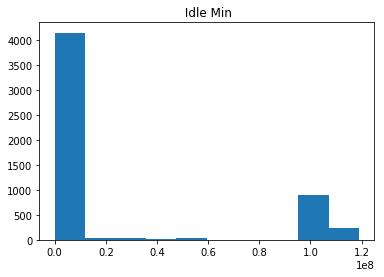

In [13]:
df_dosslowloris = df_nodup[(df_nodup[' Label']=='DoS slowloris')]
for colname in df_dosslowloris.columns:
    col = df_dosslowloris[colname]
    
    if col.dtypes in ['int64','float64']:
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

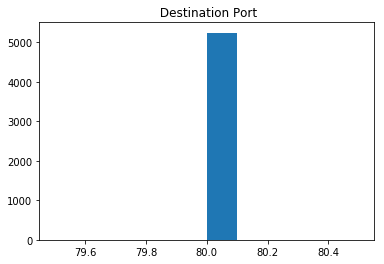

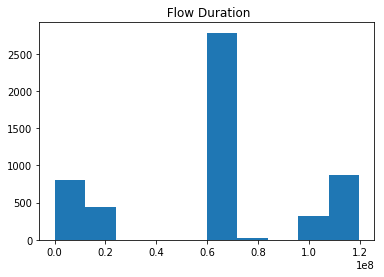

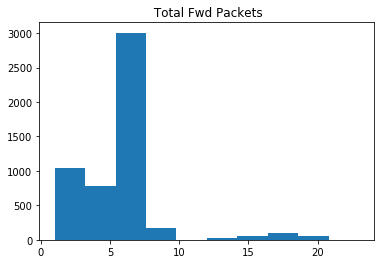

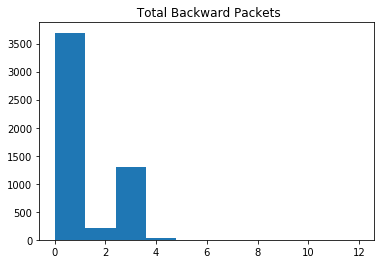

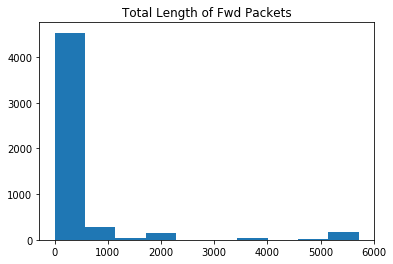

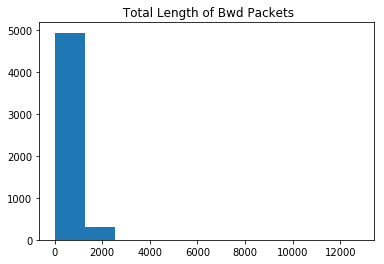

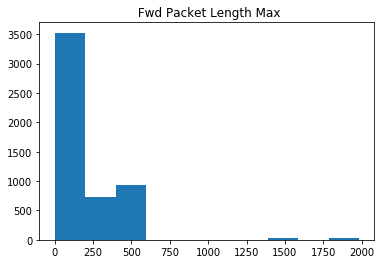

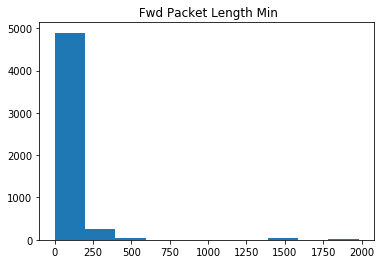

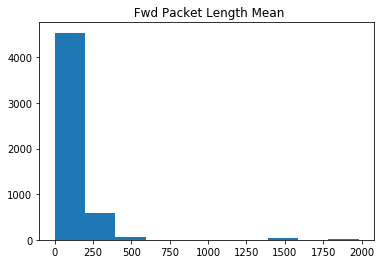

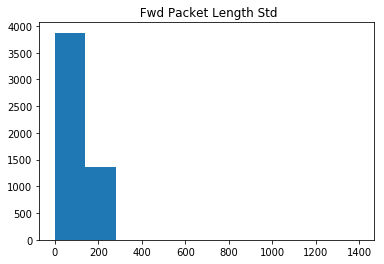

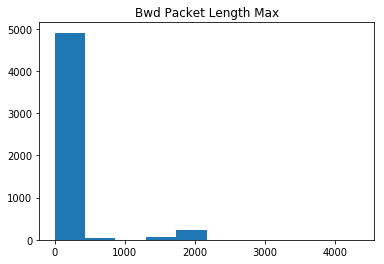

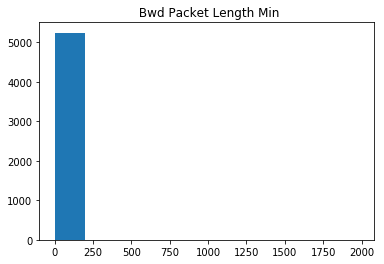

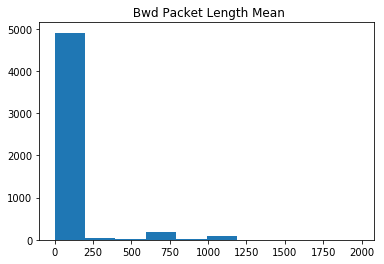

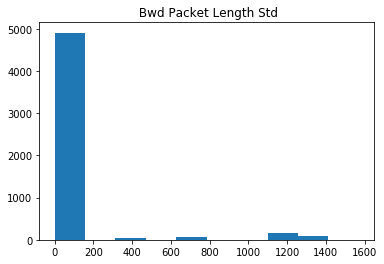

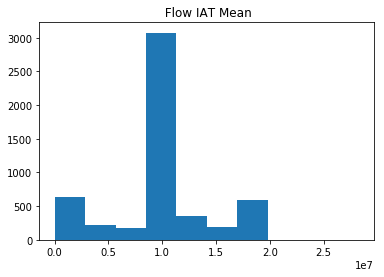

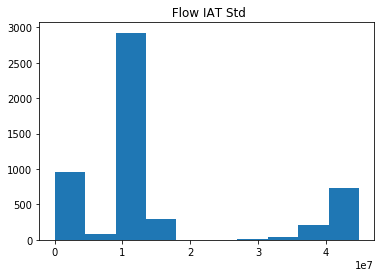

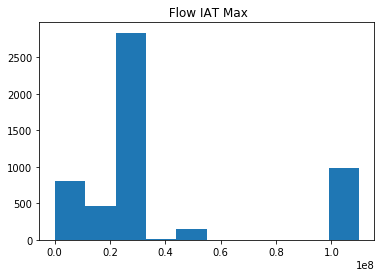

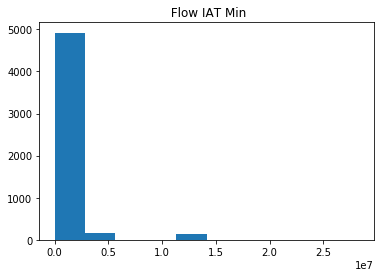

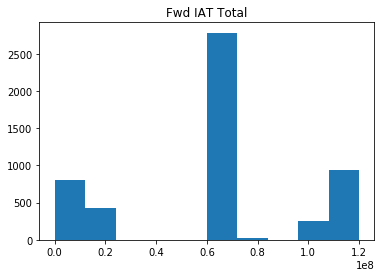

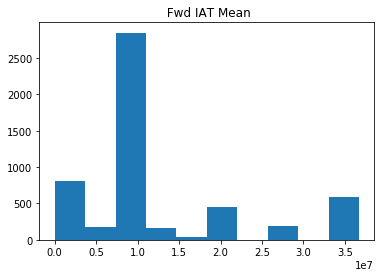

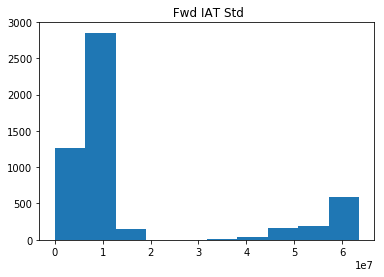

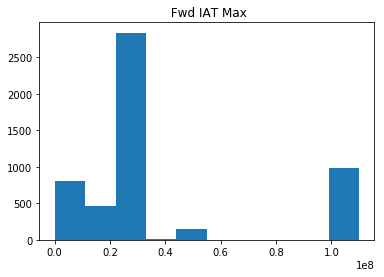

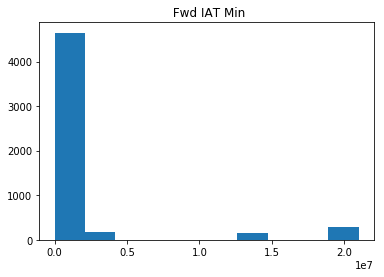

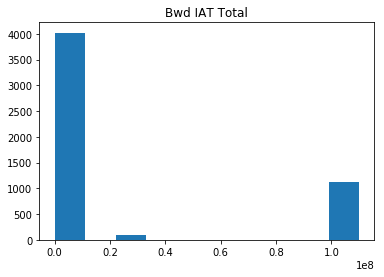

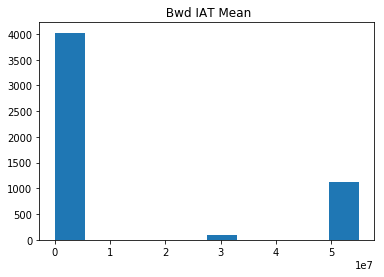

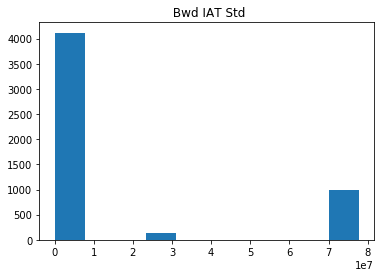

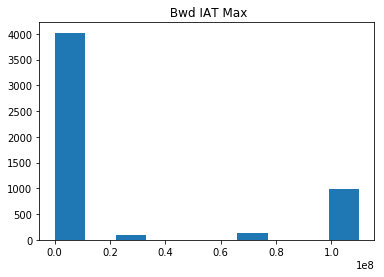

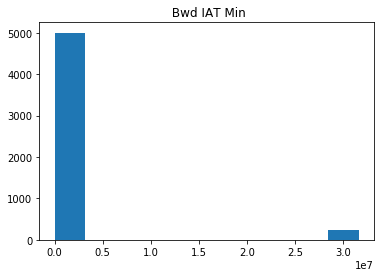

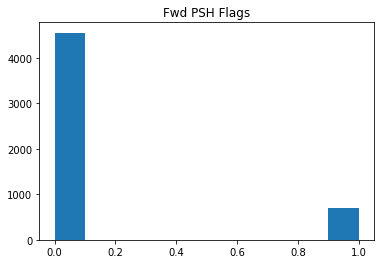

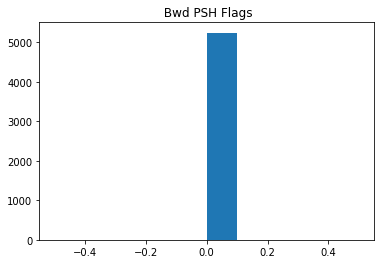

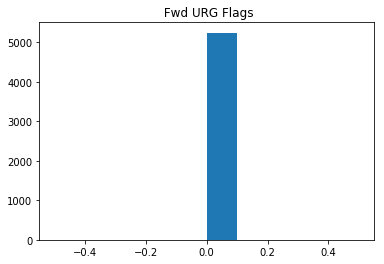

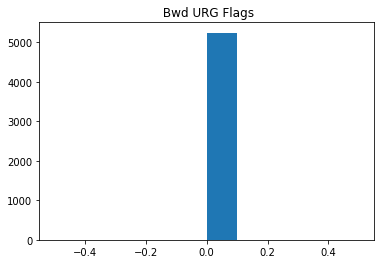

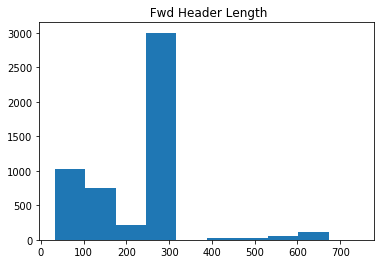

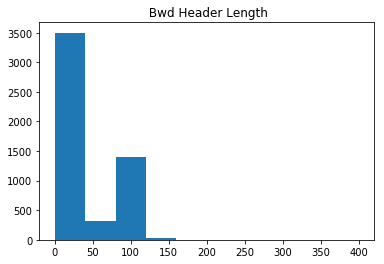

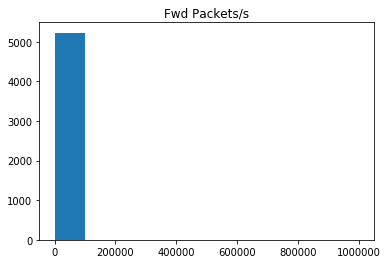

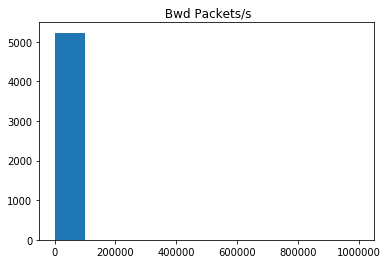

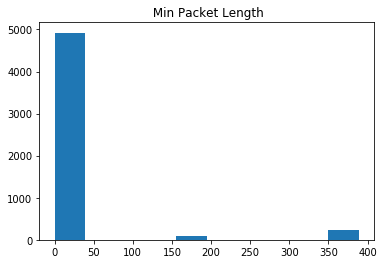

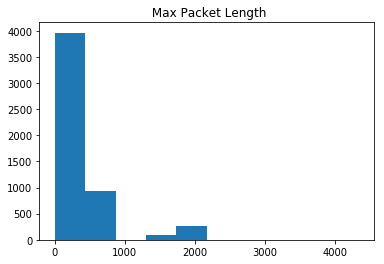

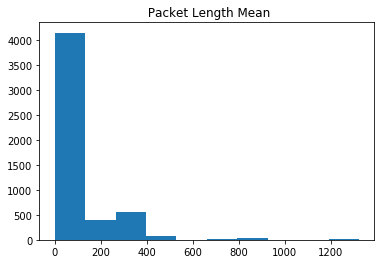

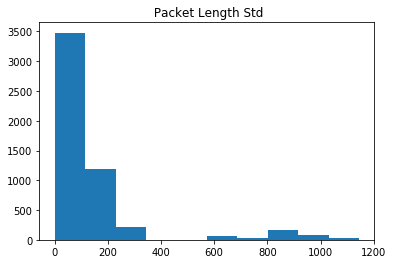

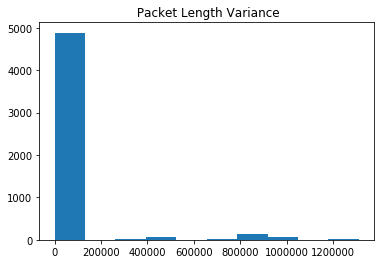

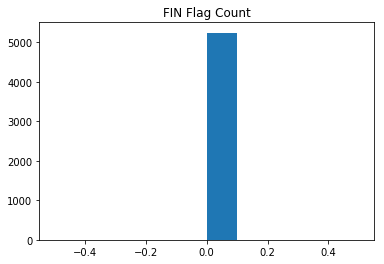

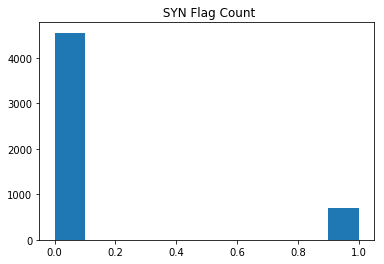

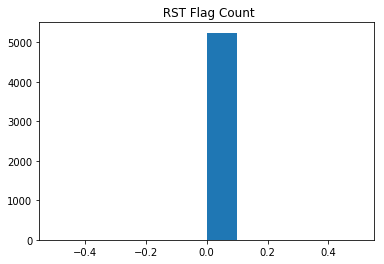

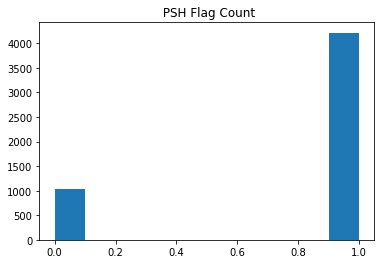

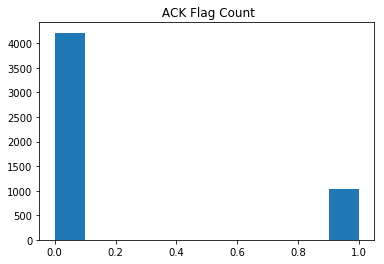

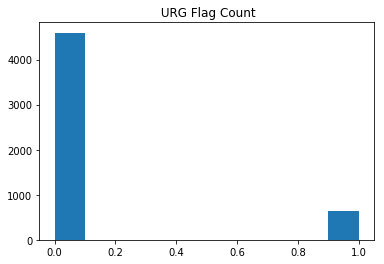

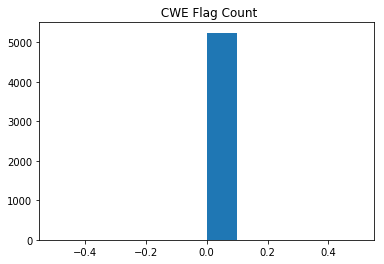

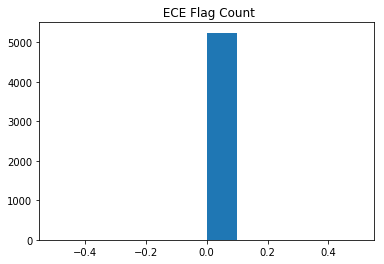

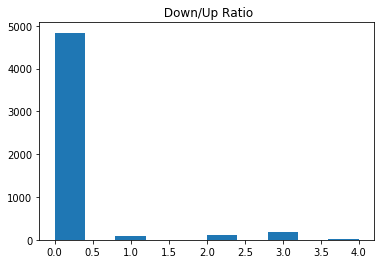

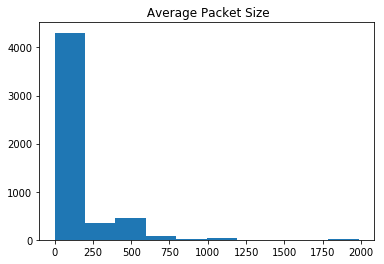

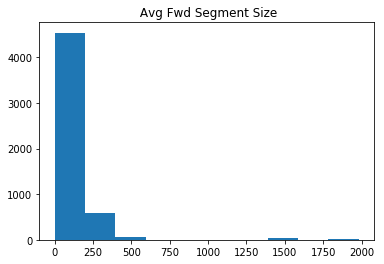

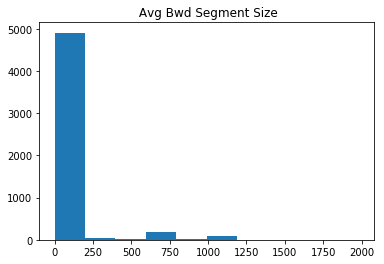

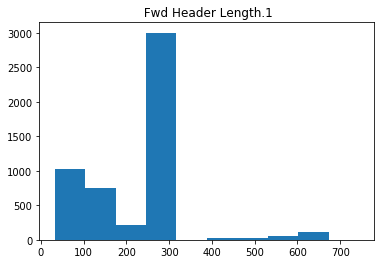

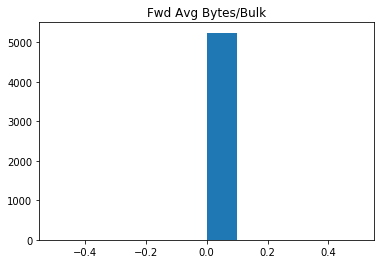

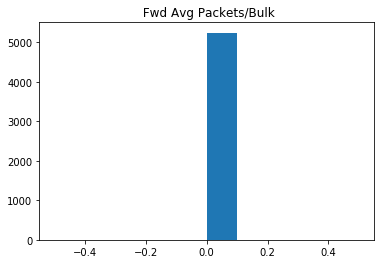

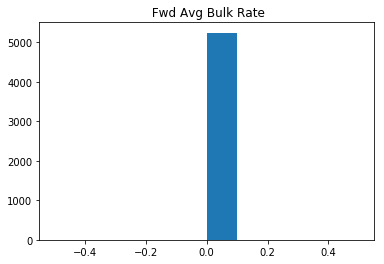

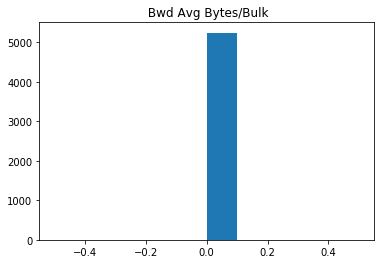

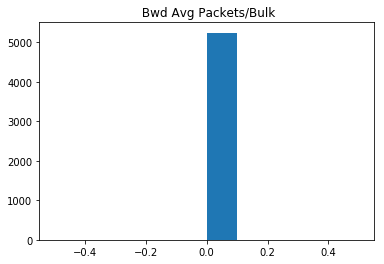

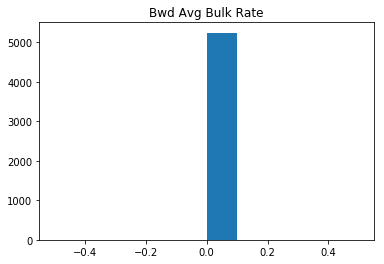

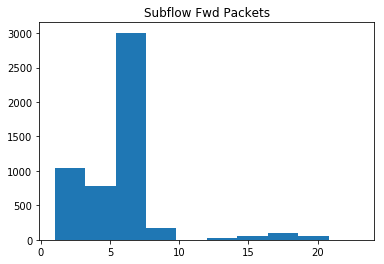

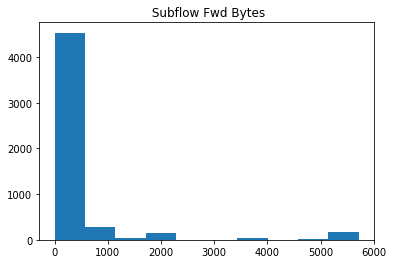

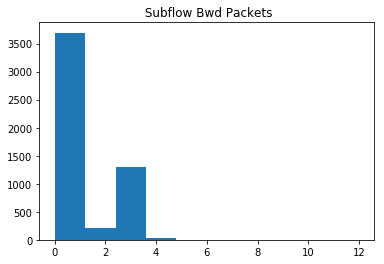

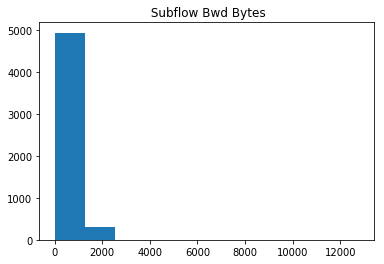

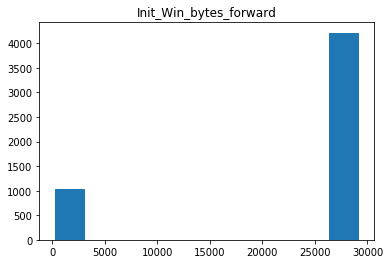

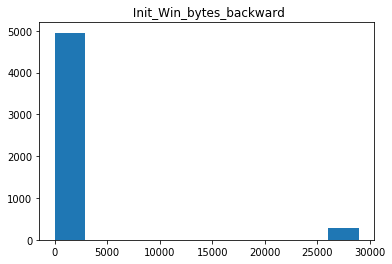

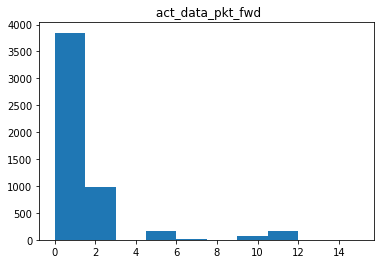

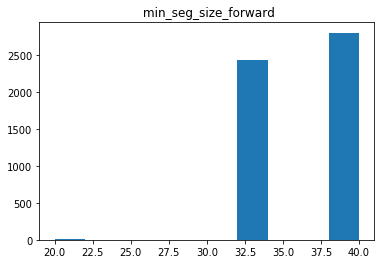

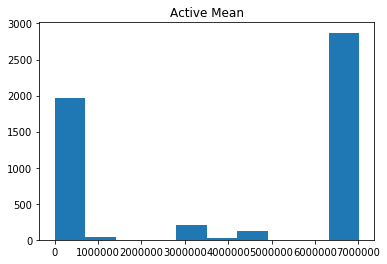

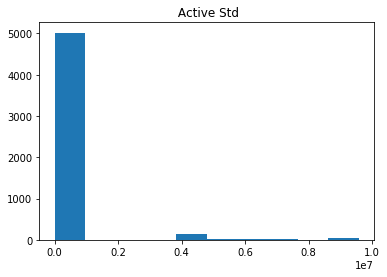

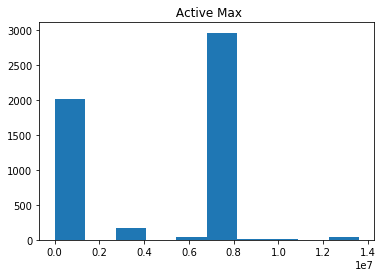

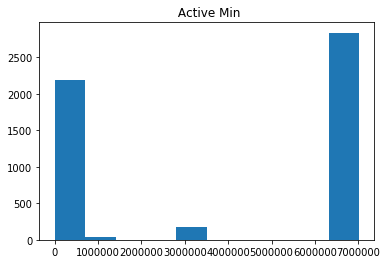

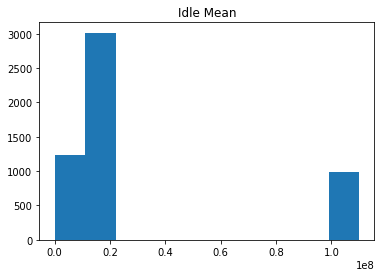

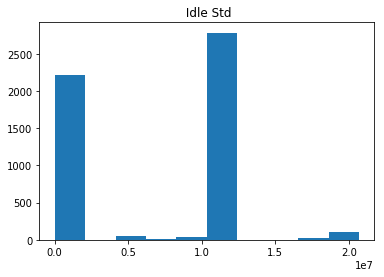

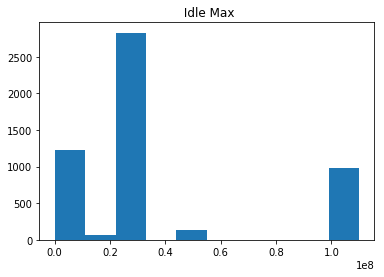

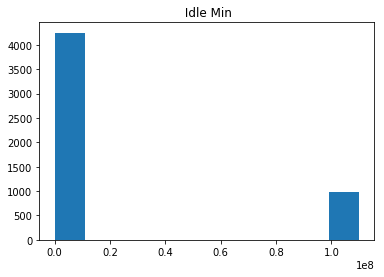

In [14]:
df_doshttptest = df_nodup[(df_nodup[' Label']=='DoS Slowhttptest')]
for colname in df_doshttptest.columns:
    col = df_doshttptest[colname]
    
    if col.dtypes in ['int64','float64']:
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

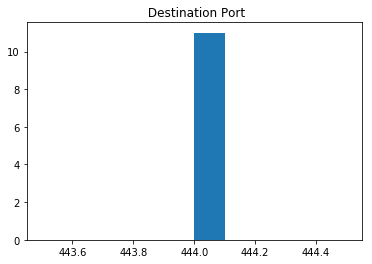

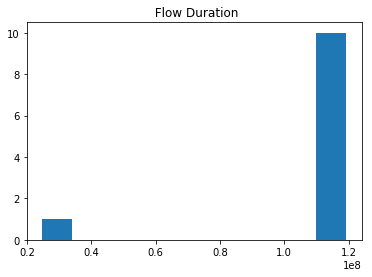

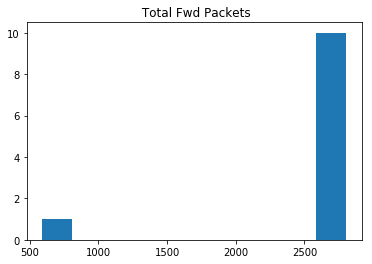

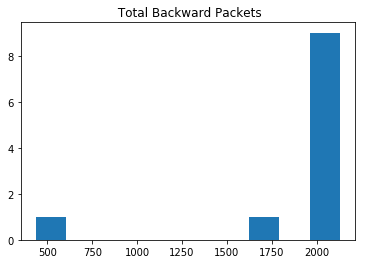

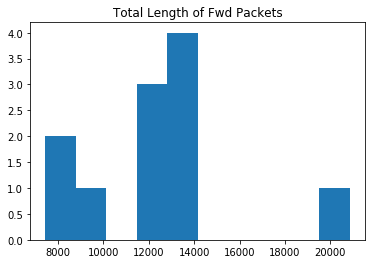

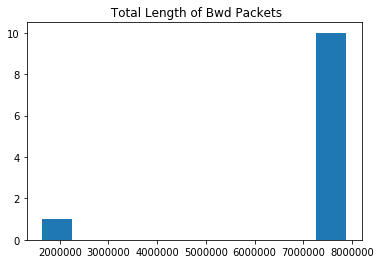

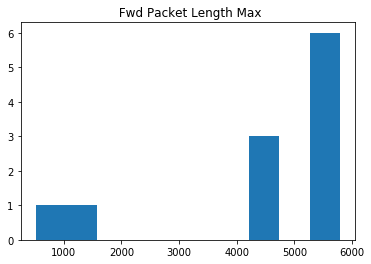

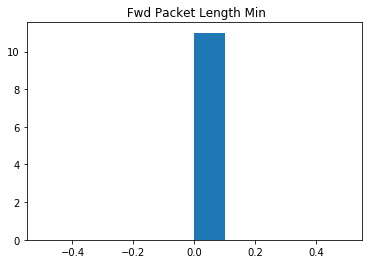

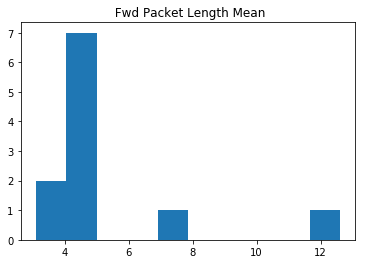

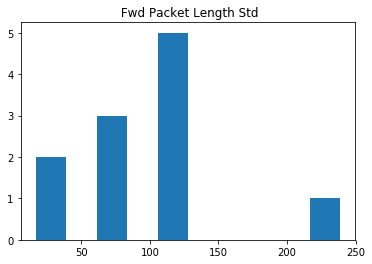

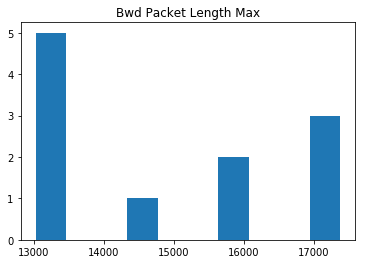

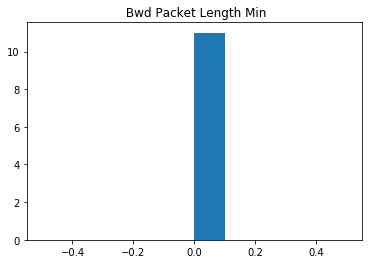

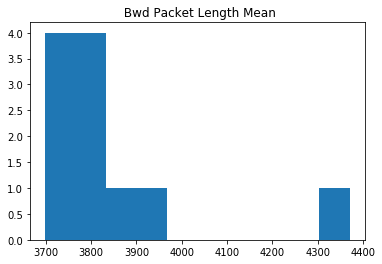

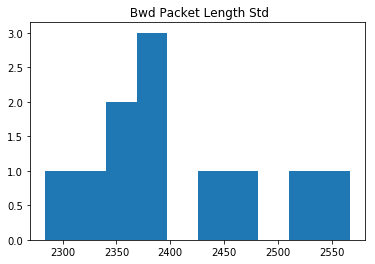

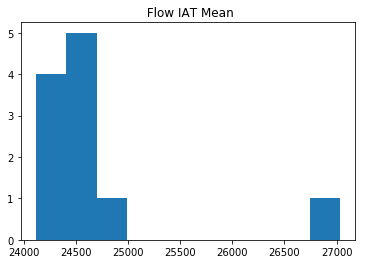

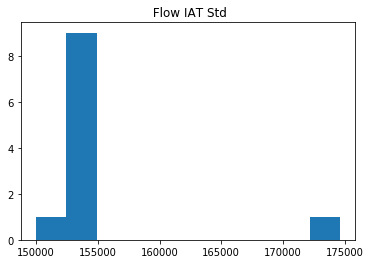

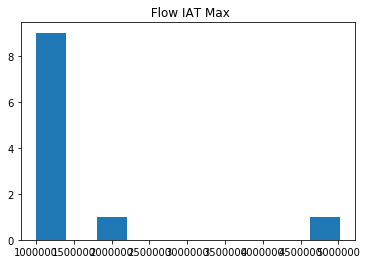

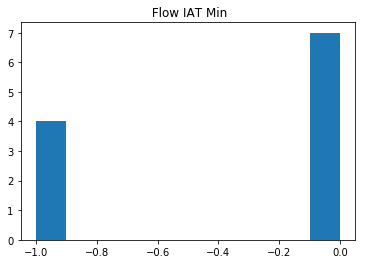

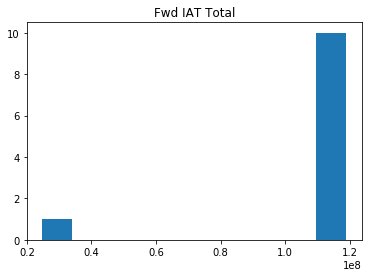

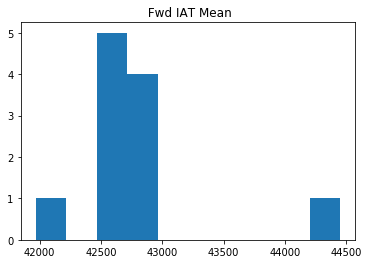

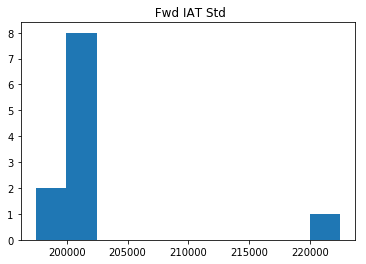

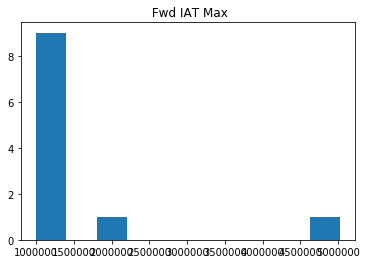

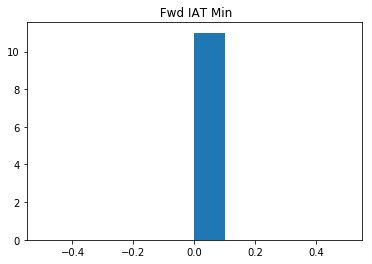

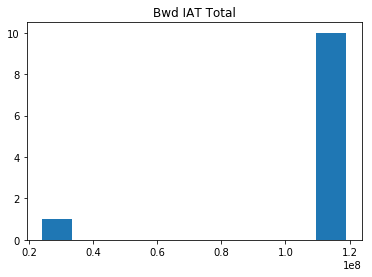

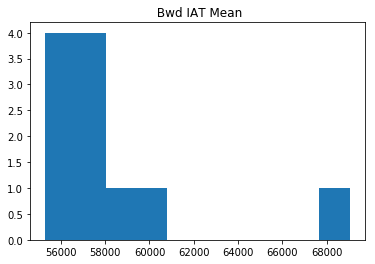

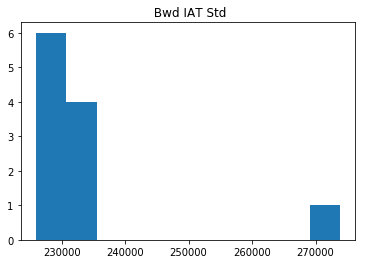

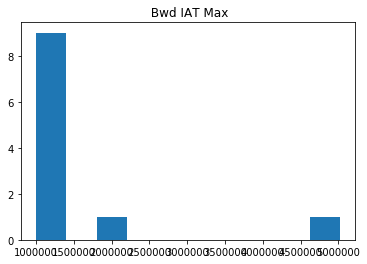

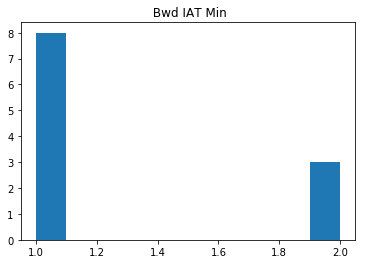

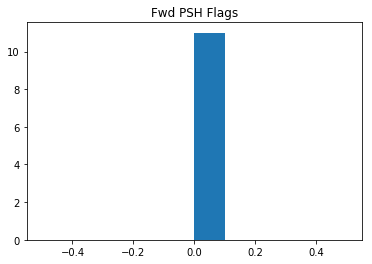

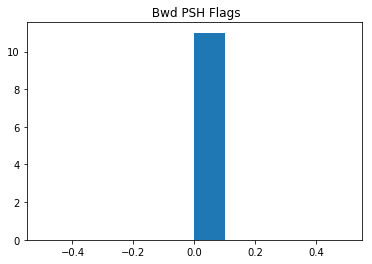

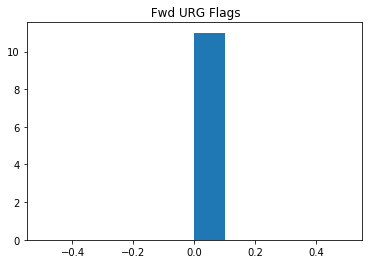

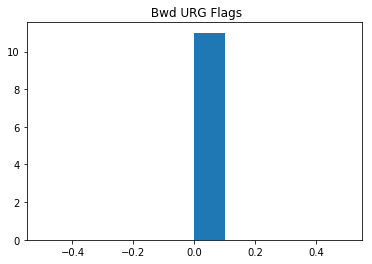

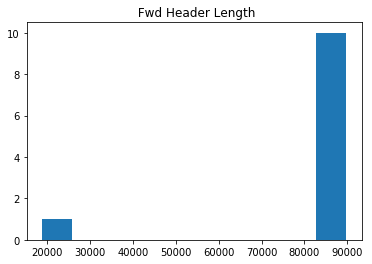

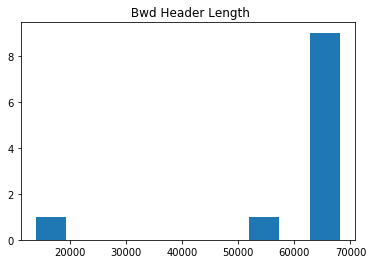

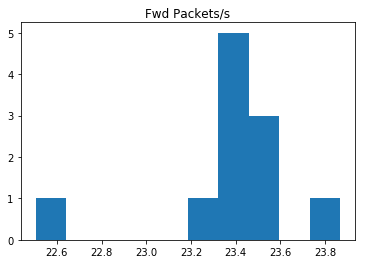

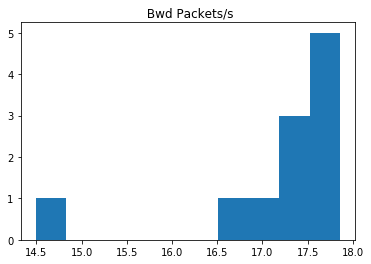

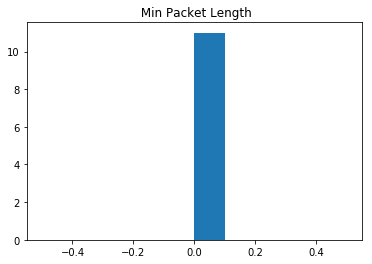

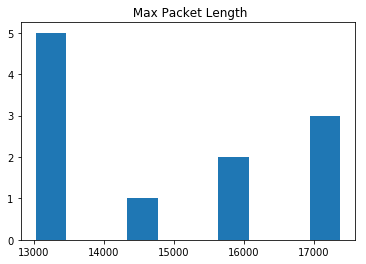

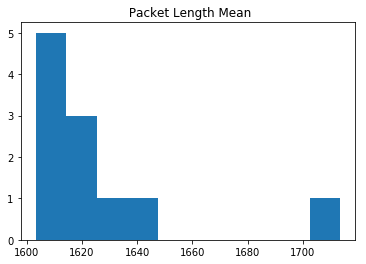

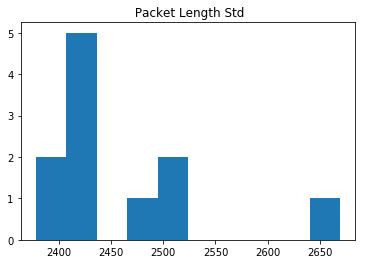

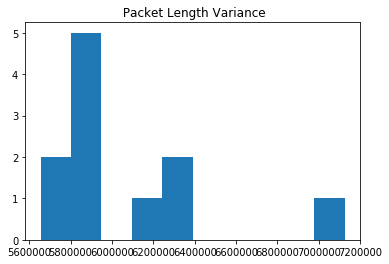

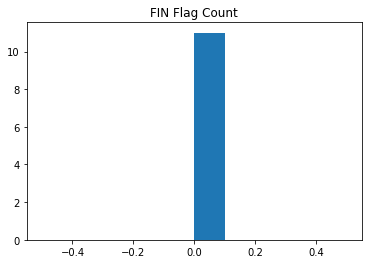

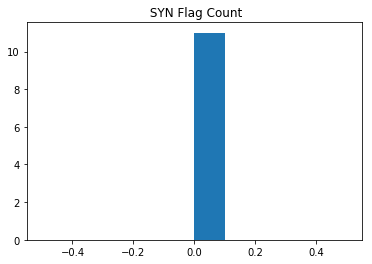

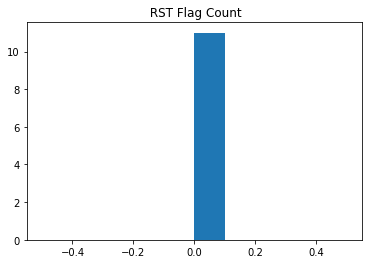

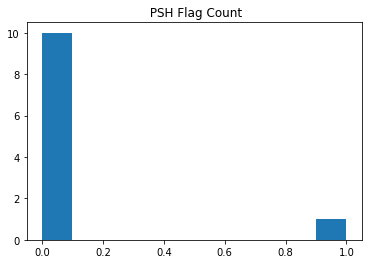

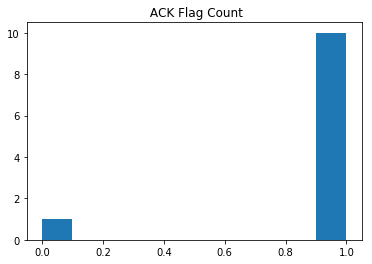

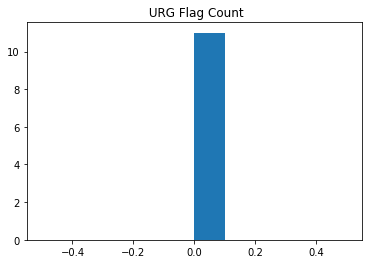

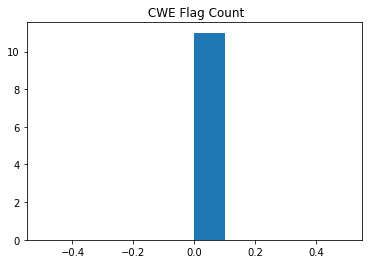

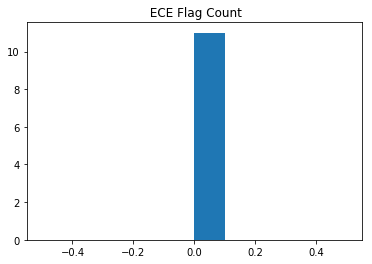

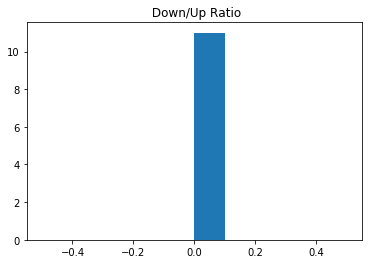

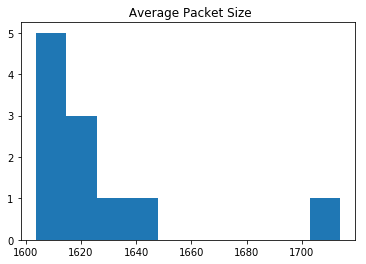

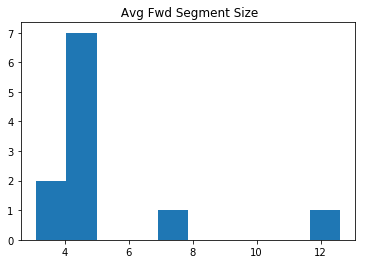

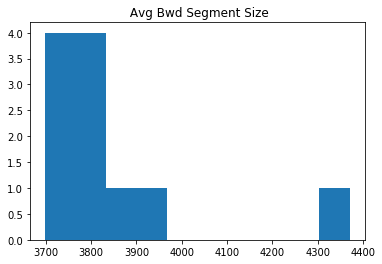

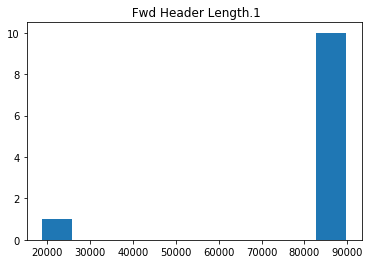

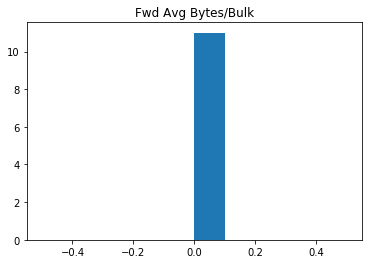

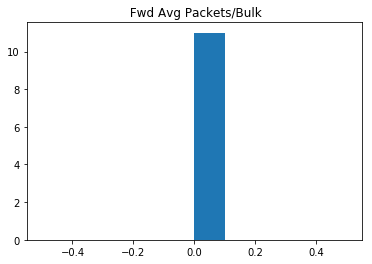

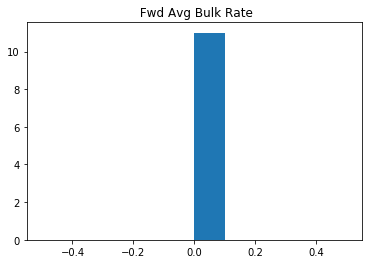

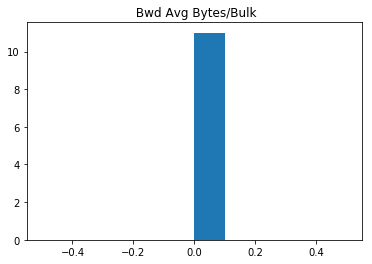

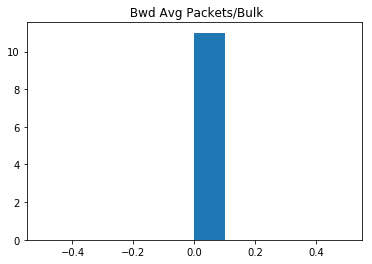

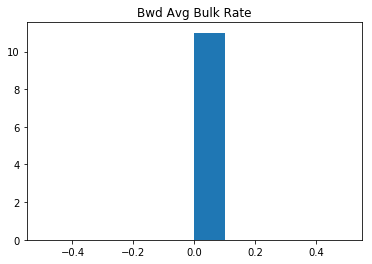

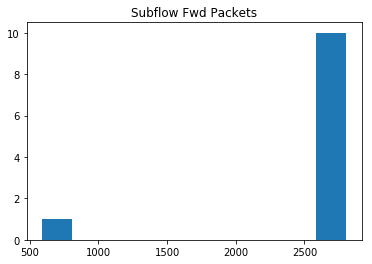

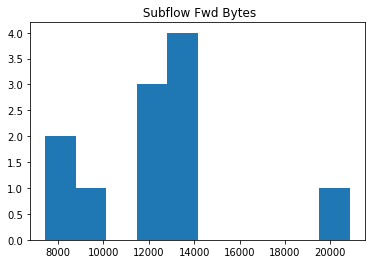

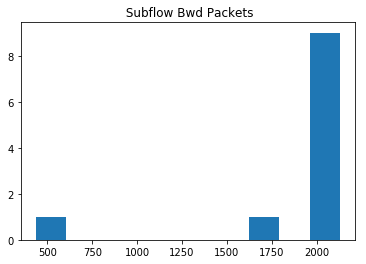

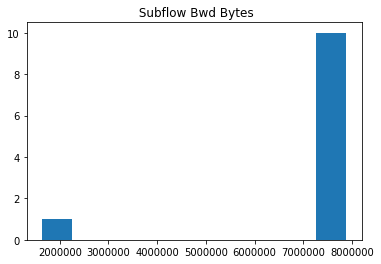

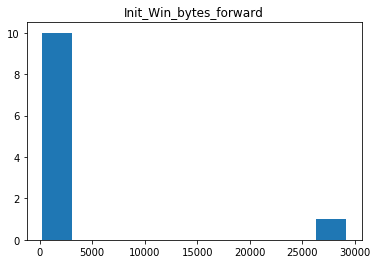

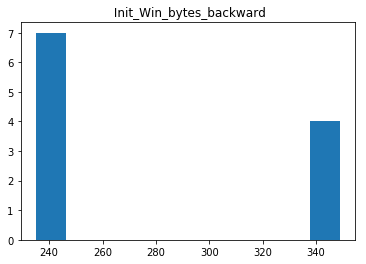

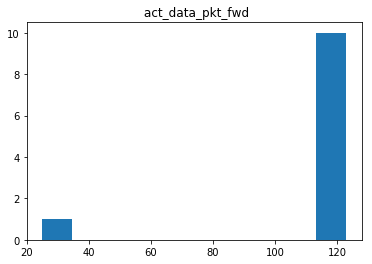

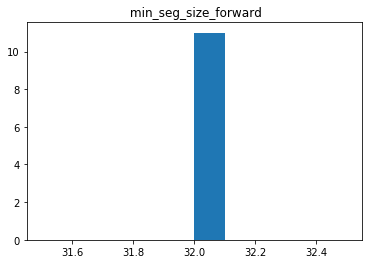

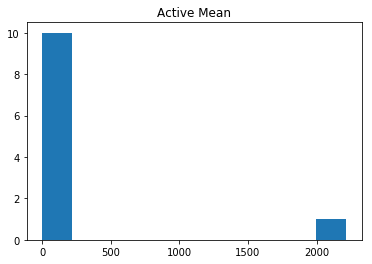

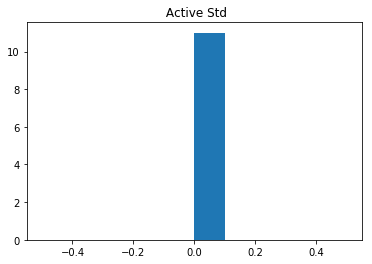

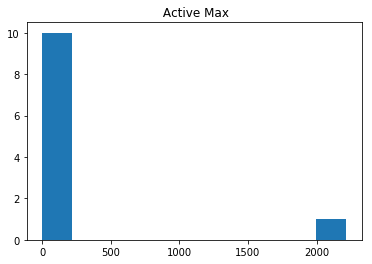

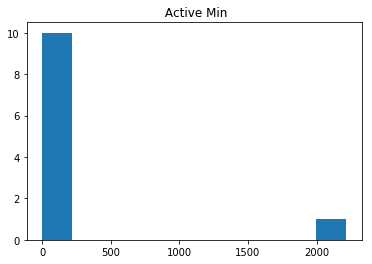

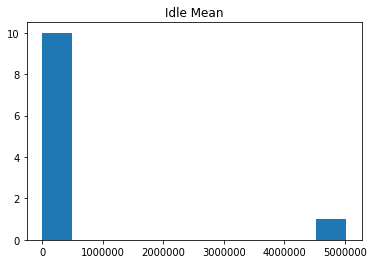

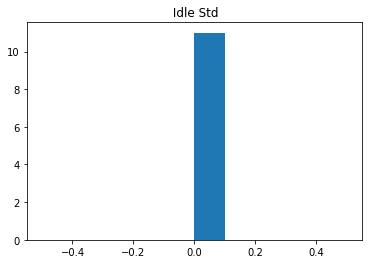

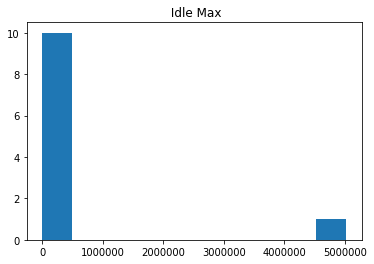

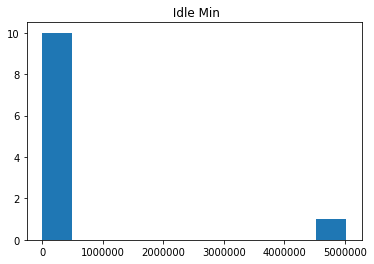

In [15]:
df_heartbleed = df_nodup[(df_nodup[' Label']=='Heartbleed')]
for colname in df_heartbleed.columns:
    col = df_heartbleed[colname]
    
    if col.dtypes in ['int64','float64']:
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

In [16]:
#' Flow Duration', ' Flow IAT Mean', Average Packet Size'

In [17]:
df_new = df_nodup[[' Flow Duration', ' Flow IAT Mean', ' Label']]
df_new

,Flow Duration,Flow IAT Mean,Label
0,38308,3.830800e+04,BENIGN
1,479,3.193333e+01,BENIGN
2,1095,7.300000e+01,BENIGN
3,15206,5.430714e+02,BENIGN
4,1092,7.800000e+01,BENIGN
5,433,3.092857e+01,BENIGN
6,1088,7.771429e+01,BENIGN
7,579225,2.061299e+03,BENIGN
8,3,3.000000e+00,BENIGN
9,4,2.000000e+00,BENIGN


In [18]:
## https://rfriend.tistory.com/411 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

dfgroup_sum = df_new.groupby(' Label').sum()
dfgroup_sum

,Flow Duration,Flow IAT Mean
Label,,
BENIGN,5320020114013,3.726744e+11
DoS GoldenEye,237823154692,1.420750e+11
DoS Hulk,13190038759511,1.104394e+12
DoS Slowhttptest,317176240676,5.261653e+10
DoS slowloris,327580068346,5.909023e+10
Heartbleed,1217476783,2.715292e+05


In [19]:
dfgroup_mean = df_new.groupby(' Label').mean()
dfgroup_mean

,Flow Duration,Flow IAT Mean
Label,,
BENIGN,1.271002e+07,8.903536e+05
DoS GoldenEye,2.312105e+07,1.381247e+07
DoS Hulk,7.589467e+07,6.354614e+06
DoS Slowhttptest,6.050672e+07,1.003749e+07
DoS slowloris,6.083195e+07,1.097312e+07
Heartbleed,1.106797e+08,2.468447e+04


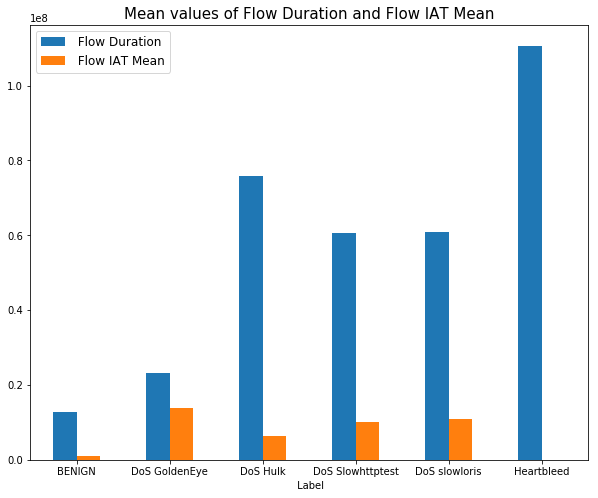

In [20]:
dfgroup_mean.plot(kind='bar', rot=0, figsize=(10, 8))
plt.title('Mean values of Flow Duration and Flow IAT Mean', fontsize=15)
plt.legend(fontsize='12')
plt.show()

In [21]:
df_new2 = df_nodup[['Total Length of Fwd Packets', ' Total Length of Bwd Packets',' Average Packet Size', ' Label']]
df_new2

,Total Length of Fwd Packets,Total Length of Bwd Packets,Average Packet Size,Label
0,6,6,9.000000,BENIGN
1,172,326,31.125000,BENIGN
2,3150,3150,393.750000,BENIGN
3,3452,6660,348.689655,BENIGN
4,3150,3152,420.133333,BENIGN
5,172,326,33.200000,BENIGN
6,3150,3152,420.133333,BENIGN
7,160,320799,1138.152482,BENIGN
8,12,0,9.000000,BENIGN
9,18,0,8.000000,BENIGN


In [22]:
dfgroup_mean2 = df_new2.groupby(' Label').mean()
dfgroup_mean2

,Total Length of Fwd Packets,Total Length of Bwd Packets,Average Packet Size
Label,,,
BENIGN,731.058160,2.347984e+04,133.801432
DoS GoldenEye,418.714758,6.565782e+03,542.318501
DoS Hulk,374.043569,1.033179e+04,850.938443
DoS Slowhttptest,438.853682,1.189721e+02,110.898726
DoS slowloris,871.831755,2.188802e+01,59.197893
Heartbleed,12509.727273,7.276361e+06,1627.051890


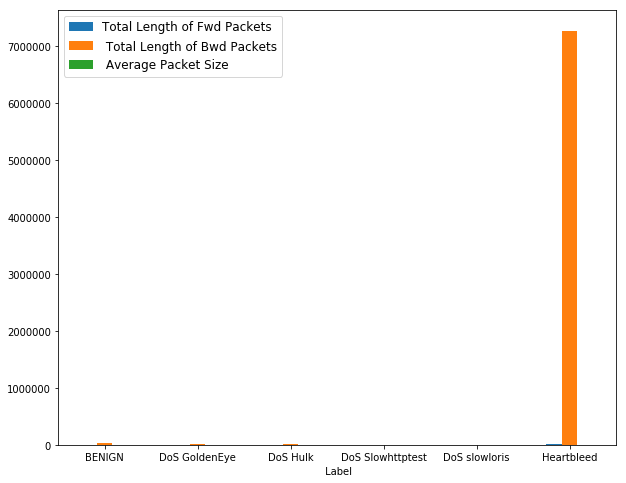

In [23]:
dfgroup_mean2.plot(kind='bar', rot=0, figsize=(10, 8))
plt.legend(fontsize='12')
plt.show()

In [24]:
dfgroup_mean3 = dfgroup_mean2[:5]
dfgroup_mean3

,Total Length of Fwd Packets,Total Length of Bwd Packets,Average Packet Size
Label,,,
BENIGN,731.058160,23479.836483,133.801432
DoS GoldenEye,418.714758,6565.782325,542.318501
DoS Hulk,374.043569,10331.790649,850.938443
DoS Slowhttptest,438.853682,118.972148,110.898726
DoS slowloris,871.831755,21.888022,59.197893


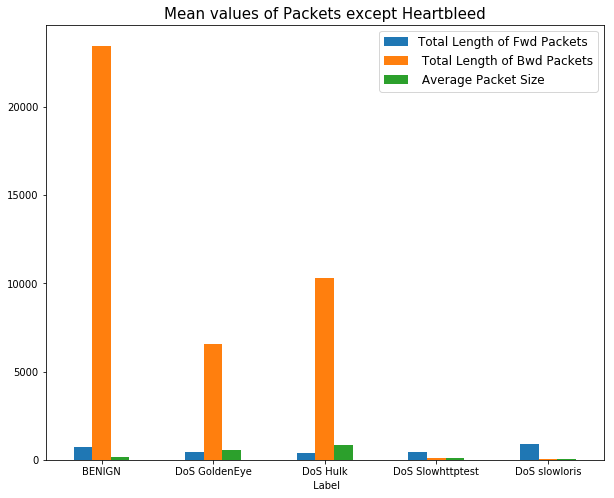

In [25]:
dfgroup_mean3.plot(kind='bar', rot=0, figsize=(10, 8))
plt.title('Mean values of Packets except Heartbleed', fontsize=15)
plt.legend(fontsize='12')
plt.show()